# Quantum Computing Simulations in Statistical Physics

This notebook features key quantum computing topics, such as the quantum coin flip, random walks in both classical and quantum forms, and implementing the classical Ising model using quantum methods. It is designed to show how quantum algorithms offer new perspectives on familiar problems. Additionally, it serves as an accessible pedagogical tool for introducing foundational quantum computing concepts.

The following Python libraries are essential for this notebook:

In [1]:
import numpy as np  # Library for numerical and mathematical operations.
import random  # Module for generating random numbers.
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile  # Qiskit classes for quantum circuits.
from qiskit_aer import Aer  # Qiskit module for simulation backends.
import matplotlib.pyplot as plt  # Library for plotting graphs and visualizations.
from time import time  # Module for measuring execution time and performance.
import copy  # Utility for creating deep copies of variables and data structures.

Here are some functions for convenience.

In [2]:
# Adjust the length of all keys in a dictionary by padding with leading zeros.
# Example: If the longest key has a length of 5, '0' becomes '00000' and '101' becomes '00101'.
def tidy(n, untidy):
    if len(untidy) != n:  # Check if the current string length is less than the target length.
        makeup = n - len(untidy)  # Calculate the number of zeros needed.
        for temp in range(makeup):
            untidy = '0' + untidy  # Add leading zeros to the string.
    return untidy  # Return the padded string.

In [3]:
# Create a dictionary to record data for all possible distances from the origin after n steps.
# The range is [0, 2^n - 1], where each value is represented as an n-bit binary string.
def creatDic(n):
    dec = np.linspace(0, (2 ** n) - 1, 2 ** n)  # Generate a range of decimal values from 0 to (2^n) - 1.
    binary = []  # List to store binary string representations of each decimal value.

    for value in dec:
        binary.append(bin(int(value))[2:])  # Convert each decimal value to a binary string.

    # Pad each binary string to ensure it has n bits.
    for temp2 in range(len(binary)):
        binary[temp2] = tidy(n, binary[temp2])

    # Create a dictionary with each binary string as a key, initialized to 0.
    newdict = {key: 0 for key in binary}
    return newdict  # Return the initialized dictionary.

In [4]:
# This function organizes the data in 'newresult' in an increasing order from 0 to (2^l) - 1.
def autoRenew(n, newresult):
    # Initialize a blank dictionary with all possible (2^n)-bit binary strings as keys.
    blankdict = creatDic(n)

    # Get the total number of keys in the provided 'newresult' dictionary.
    totalnumber = len(list(newresult.keys()))

    # Update 'blankdict' with the values from 'newresult'.
    for temp2 in range(totalnumber):
        key = list(newresult.keys())[temp2]  # Get each key from 'newresult'.
        blankdict[key] = newresult[key]  # Set the corresponding value in 'blankdict'.

    return blankdict  # Return the updated dictionary.

In [5]:
# Plot the updated results as a bar chart using matplotlib.
def draw(n, newresult):
    updatedict = autoRenew(n, newresult)
    plt.bar(np.linspace(-2 ** (n - 1), 2 ** (n - 1), 2 ** n), updatedict.values())

In [6]:
# A function that organizes data by updating the values of a dictionary based on a given integer key.
def encode(dyctionary, intkey):
    strkey = str(intkey)  # Convert the integer key to a string.

    # Check if the string key is already in the dictionary.
    if strkey in dyctionary:
        dyctionary[strkey] += 1  # Increment the value if the key exists.
    else:
        dyctionary[strkey] = 1  # Initialize the key with a value of 1 if it doesn't exist.

In [7]:
# A function that visualizes the data in a dictionary using a bar graph.
def plotdyct(inputdictionary):
    plt.bar(inputdictionary.keys(), inputdictionary.values())  # Plot a bar graph of the dictionary data.
    plt.xticks(ticks=list(inputdictionary.keys()), rotation=270)  # Rotate x-axis labels for better readability.

## 1. Coin Model

### 0. Introduction

In classical physics, a coin toss is often considered a simple, deterministic system governed by
Newtonian mechanics. The outcome—either heads or tails—is determined by initial conditions
such as the force applied, air resistance, the angle of the toss, and the coin’s mass distribution.
However, due to the complexity of precisely measuring and replicating these initial conditions,
we treat the toss as probabilistic, assuming an equal likelihood of landing heads or tails. This
assumption leads to a probability of $\frac{1}{2}$ for either outcome. In programming, this probabilistic model
is often implemented using a random number generator that simulates the 50-50 chance, effectively
capturing the essence of a fair coin toss as seen in classical probability theory. Despite its simplicity,
this model provides valuable insights into randomness and statistical behavior in physical systems.

### 1. Classic Algorithm

Simply enough, we can implement the coin toss in one line of code:

In [8]:
print(random.randint(0, 1))

1


In the code above, we represent heads as 1 and tails as 0. To simulate a coin toss, we use a random function that generates either a 0 or 1 arbitrarily. If we run this simulation thousands of times, we observe the expected  $\frac{1}{2}$  probability for each outcome. But how does the random function actually work?

The ‘random’ function isn’t truly random. This applies not just to Python but to most programming languages, which use what’s called ‘pseudo-randomness.’ Behind the scenes, Python uses complex algorithms to generate numbers that appear random. A common formula for this is:

$$X_{n+1} = (aX_n + c)\mod m$$

In this equation,  $X_{n+1}$  is the next random number generated, while  $X_n$ ,  $a $,  $c$ , and  $m$  are predefined large constants. The sequence of random numbers starts from a customizable initial value called a 'seed.' For example, try setting a seed before generating random numbers—you’ll find that the same sequence is produced each time the seed is unchanged.

According to experts, his pseudo-randomness can be problematic. In simulations that rely on numerical methods, patterns we observe could simply be artifacts of the pseudo-random algorithm. Classical computing struggles with this limitation, but quantum computing offers a promising alternative by generating true randomness through quantum processes, potentially providing more accurate models for complex systems.

### 2. Quantum Algorithm

Codes for the quantum algorithm may look terrifying, but it really isn't as difficult as it looks:

In [9]:
# Define a quantum circuit with 1 qubit and 1 classical bit.
qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gate to the first qubit.
qc.h(qr[0])

# Measure the first qubit into the first classical bit.
qc.measure(qr[0], cr[0])

# Use the Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Transpile and execute the circuit.
transpiled_qc = transpile(qc, simulator)
job = simulator.run(transpiled_qc, shots=1000)
result = job.result()

# Get and print results.
counts = result.get_counts(qc)
print("Counts:", counts)

Counts: {'0': 501, '1': 499}


We now add the Hadamard gate.

In [10]:
# Initialize a quantum circuit with 1 qubit.
qt = QuantumRegister(1)
qc = QuantumCircuit(qt)

# Apply Hadmard gate to the qubit.
qc.h(qt[0])

# Draw the circuit with matplotlib visualizaiton.
qc.draw('latex')

 Mathematically, we express the Hadamard gate as:

$$H|0 \rangle = \frac{1}{\sqrt{2}}|0 \rangle + \frac{1}{\sqrt{2}}|1\rangle$$

Just as we described, the coin is now in two states at the same time. The $\frac{1}{\sqrt{2}}$ is called probability amplitude. The probability of the coin being in one state is the square of this amplitude. In this case, the probability for both states is $\frac{1}{2}$. 

As described, the quantum coin is now in a $\textbf{superposition}$, meaning it exists in two states simultaneously. The values $ \alpha $ and $\beta$ represent the $\textbf{probability amplitudes}$ of each state. The probability of the coin being in a specific state is given by the square of its amplitude, so in this case, both states have a probability of $ \frac{1}{2} $.

This behavior is impossible in classical computing, where a bit can only be either 0 or 1, never both. As a result, one classical bit can only represent one state (0 or 1) at any given time. In contrast, a quantum bit (qubit) can represent both states simultaneously (0 and 1), allowing quantum computing to process multiple states in parallel. The $\textbf{Hadamard gate}$ is what creates this superposition in quantum computing, generating truly random outcomes. 

## 2. Random Walk

### 0. Introduction

Here's the setup. Imagine a drunk man standing on the street. He is so drunk that he can't control his next step. His next step could be either to the left or to the right. To construct a mathematical model out of this, we assume the man is standing on the origin of the $x$-axis. A step to the left will bring his position to $-1$ while a right step will add a $+1$ to his $x$ coordinate. The man's probability of walking right is $p$, and the left step is $(1-p)$.

### 1. Classical Random Walk Algorithm

In a classical algorithm, the setup is straightforward. We start by assigning the person an initial  $x$-coordinate, typically $0$. Then, we simulate a 'coin toss' using a random number generator, allowing us to adjust the probability as needed. If the result is heads, the person takes a step to the left, decreasing the  $x$-coordinate by $1$. If the result is tails, they step to the right, increasing the x-coordinate by 1. Below is an example of code with $p = (1-p) = \frac{1}{2}$.

<BarContainer object of 201 artists>

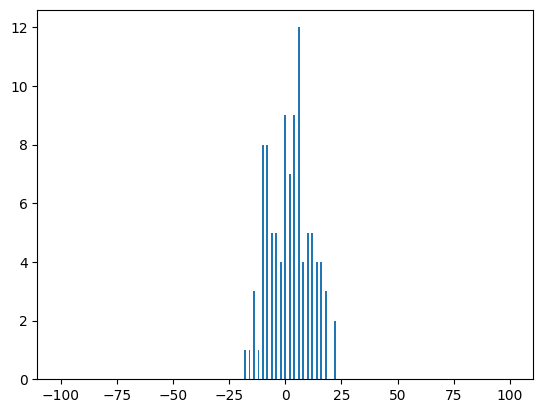

In [11]:
n = 100  # Number of steps for each random walk; adjustable for convenience.
groupNumber = 100  # Number of groups of data (i.e., number of random walk experiments).
trialNumber = n  # Number of steps for each trial; equal to 'n' in this case.

disRange = np.linspace(-n, n, (2 * n + 1))  
# Sets the possible range of distances from the origin, from -n to n with (2*n + 1) intervals. For large trial numbers (> 100), consider using n/2 for performance, but 'n' is the safest option to ensure full range coverage.
finDistance = {key: 0 for key in disRange}  # Initializes a dictionary to store final distances for each trial.

# Perform 'groupNumber' random walk experiments.
for temp1 in range(groupNumber):
    distance = 0  # Start at the origin for each random walk.
    # Simulate 'trialNumber' steps for the current trial.
    for temp2 in range(trialNumber):
        coin = random.randint(0, 1)  # Simulate a 'coin toss': 0 for heads, 1 for tails.
        if coin == 0:  # If heads (0), take a step to the left.
            distance -= 1
        elif coin == 1:  # If tails (1), take a step to the right.
            distance += 1
    finDistance[distance] += 1  # Update the final distance count for the current trial.

plt.bar(finDistance.keys(), finDistance.values())  # Plot the distribution of final distances.

As we increase the number of trials, we will observe

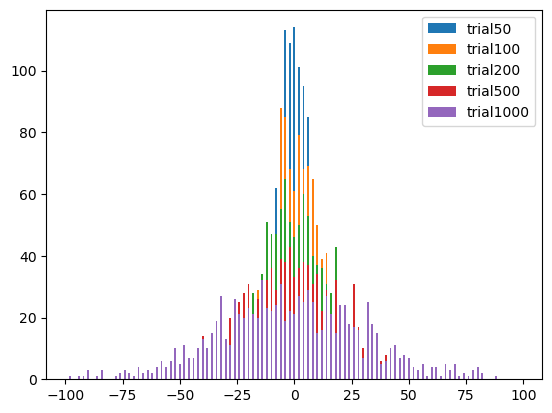

As the number of trials increases, the man will tend to go back to his original coordinates. In the long term, the man's position can be represented with the expected value of his x coordinates. For the special case where $p = (1-p) = \frac{1}{2}$, we have:

$$
\langle x\rangle = 1\times p + (-1)\times(1-p) = 1\times\frac{1}{2} - 1\times\frac{1}{2} = 0 
$$

### 2. Quantum Algorithm

The basic principle of a quantum algorithm is similar to that of a classical one. However, instead of simulating a coin flip, we use the Hadamard gate, which creates genuine quantum randomness. In the paper, we describe the distance from the origin with a ket vector like $|1 \rangle$. However, a qubit is still a 'bit'. It cannot be a number larger than 1. We use multiple qubits to represent the distance with binary encoding (e.g., ‘10’ corresponds to 2 units from the origin). To implement this, we require a special increment/decrement function that can handle binary values appropriately.

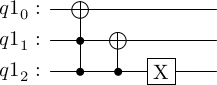

In [12]:
# Define the increment gate for quantum random walk.
qt = QuantumRegister(3)  # Initialize a quantum register with 3 qubits.
qc = QuantumCircuit(qt)  # Create a quantum circuit using the defined register.

# Apply quantum gates to the qubits
qc.ccx(qt[2], qt[1], qt[0])  # Apply a Toffoli gate (CCX), which flips qt[0] if both qt[2] and qt[1] are in state |1>.
qc.cx(qt[2], qt[1])  # Apply a CNOT gate, flipping qt[1] if qt[2] is in state |1>.
qc.x(qt[2])  # Apply an X gate to qt[2], flipping its state from |0> to |1> or vice versa.

qc.draw('latex')  # Visualize the circuit.

This is an example of how this works, suppose we start with $|011\rangle$, after the circuit the result should be $|100\rangle$
1. After first(CCX) Gate: $|111\rangle$
2. After second(CX) Gate: $|101\rangle$
3. After third(X) Gate: $|100\rangle$

Above is a qualitative description of the circuit. We can also quantitatively derive the circuit. For example, in the paper, we explicitly write the expression of the Shift Operator $S$ for one coin state and one position state. If we calculate the matrix for $S$ explicitly, we will get the left-hand side of the following equation:
$$
\begin{pmatrix}
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix} =
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}
\otimes
\begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
$$
On the right-hand side are our desired gates. The first is an identity gate $I$, suggesting we do nothing to the coin state. The second term is an $X$ gate, which is just the increment/decrement gate if there is only one qubit. One can also extend this method to check that the increment/decrement gate should produce the same matrix as the Shift Operator $S$ when there is more than one qubit for position state.

The decrement function works in the reverse way.

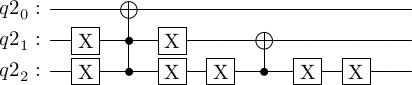

In [13]:
# Define the decrement gate for quantum random walk.
qt = QuantumRegister(3)  # Initialize a quantum register with 3 qubits.
qc = QuantumCircuit(qt)  # Create a quantum circuit using the defined register.

# CCX gate with X gates before and after the control qubits is called a complementary CCX gate.
# Normal CCX gate flips the target qubit when both of the control qubits are 1. A complementary
# CCX gate flips the target qubit when both of the control qubits are 0. 
qc.x(qt[2])
qc.x(qt[1])
qc.ccx(qt[2], qt[1], qt[0])
qc.x(qt[2])
qc.x(qt[1])

# A complementary CX gate. Flip the target circuit when the control circuit is 0.
qc.x(qt[2])
qc.cx(qt[2], qt[1])
qc.x(qt[2])

# A X gate to count the shift on the last qubit.
qc.x(qt[2]) 

qc.draw('latex')  # Visualize the circuit.

An example code for a maximum distance of $7$ units from the origin would look like this:

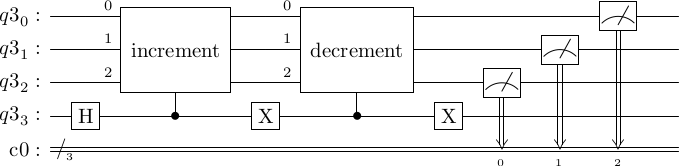

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Initialize a quantum register with 4 qubits
qr = QuantumRegister(4)

# Initialize a classical register with 3 bits
cr = ClassicalRegister(3)

# Create the main quantum circuit with the defined quantum and classical registers
qc = QuantumCircuit(qr, cr)

# -------------------------
# Initialize  the 'increment' sub-circuit as defined previously.
# -------------------------

sub_q1 = QuantumRegister(3)  # Initialize a 3-qubit register for the increment sub-circuit
sub_circ1 = QuantumCircuit(sub_q1, name='increment')
sub_circ1.ccx(sub_q1[2], sub_q1[1], sub_q1[0])
sub_circ1.cx(sub_q1[2], sub_q1[1])
sub_circ1.x(sub_q1[2])

# Convert the 'increment' sub-circuit to a controlled gate
incr = sub_circ1.to_gate().control(1)

# -------------------------
# Initialize  the 'decrement' sub-circuit as defined previously.
# -------------------------

sub_q2 = QuantumRegister(3)  # Initialize a 3-qubit register for the decrement sub-circuit
sub_circ2 = QuantumCircuit(sub_q2, name='decrement')  # Create the decrement sub-circuit

sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])
sub_circ2.ccx(sub_q2[2], sub_q2[1], sub_q2[0])
sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])
sub_circ2.x(sub_q2[2])
sub_circ2.cx(sub_q2[2], sub_q2[1])  
sub_circ2.x(sub_q2[2])
sub_circ2.x(sub_q2[2])

# Convert the 'decrement' sub-circuit to a controlled gate
decr = sub_circ2.to_gate().control(1)

# -------------------------
# Add gates to the main quantum circuit
# -------------------------

qc.h(3)  # Apply a Hadamard gate to qr[3], creating superposition

# Apply the 'increment' controlled gate to qr[3], qr[0], qr[1], and qr[2]
qc.append(incr, [qr[3], qr[0], qr[1], qr[2]])

# Apply X gates so the decrement gate is activated when the control qubit is 0.
qc.x(3)
qc.append(decr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3) 

# Measure qr[2], qr[1], and qr[0] and store the results in the classical register cr
qc.measure([qr[2], qr[1], qr[0]], cr)

# Visualize the circuit.
qc.draw('latex')

To showcase the difference between these two algorithms, we run a version with a maximum distance of 63.

{'0000100': 512, '1111100': 512}


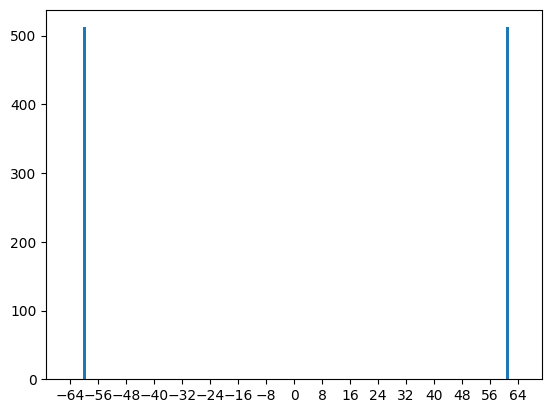

In [15]:
l = 7         # l shows the maximum distance. The maximum distance you can go away from the center point is 2^l.
n = 60        # n here is the step number you want. n is smaller than 2^l.

# Create a quantum circuit with l+1 quantum qubits and l classical bits
qr = QuantumRegister(l + 1) 
cr = ClassicalRegister(l)
qc = QuantumCircuit(qr, cr)

# -------------------------
# Define the 'increment' sub-circuit. Details about this sub-circuit can be referred to explanations earlier in this document.
# -------------------------
sub_q1 = QuantumRegister(7)
sub_circ1 = QuantumCircuit(sub_q1, name='increment')
sub_circ1.mcx([sub_q1[6], sub_q1[5], sub_q1[4], sub_q1[3], sub_q1[2], sub_q1[1]], sub_q1[0])
sub_circ1.mcx([sub_q1[6], sub_q1[5], sub_q1[4], sub_q1[3], sub_q1[2]], sub_q1[1])
sub_circ1.mcx([sub_q1[6], sub_q1[5], sub_q1[4], sub_q1[3]], sub_q1[2])
sub_circ1.mcx([sub_q1[6], sub_q1[5], sub_q1[4]], sub_q1[3])
sub_circ1.ccx(sub_q1[6], sub_q1[5], sub_q1[4])
sub_circ1.cx(sub_q1[6], sub_q1[5])
sub_circ1.x(sub_q1[6])

incr = sub_circ1.to_gate().control(1)


# -------------------------
# Define the 'decrement' sub-circuit. Details about this sub-circuit can be referred to explanations earlier in this document.
# -------------------------

sub_q2 = QuantumRegister(7)
sub_circ2 = QuantumCircuit(sub_q2, name='decrement')

sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])
sub_circ2.x(sub_q2[1])
sub_circ2.mcx([sub_q2[6], sub_q2[5], sub_q2[4], sub_q2[3], sub_q2[2], sub_q2[1]], sub_q2[0])
sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])
sub_circ2.x(sub_q2[1])

sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])
sub_circ2.mcx([sub_q2[6], sub_q2[5], sub_q2[4], sub_q2[3], sub_q2[2]], sub_q2[1])
sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.mcx([sub_q2[6], sub_q2[5], sub_q2[4], sub_q2[3]], sub_q2[2])
sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])

sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.mcx([sub_q2[6], sub_q2[5], sub_q2[4]], sub_q2[3])
sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])

sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.ccx(sub_q2[6], sub_q2[5], sub_q2[4])
sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])

sub_circ2.x(sub_q2[6])
sub_circ2.cx(sub_q2[6], sub_q2[5])
sub_circ2.x(sub_q2[6])

sub_circ2.x(sub_q2[6])

decr = sub_circ2.to_gate().control(1)

# -------------------------
# Main circuit.
# -------------------------
qc.x(0) # This line of codes ensures a center point in the middle of the bar graph, instead of using origin as the classic case.
qc.h(l) # Set up the 'coin'

# We use a for loop to repeat the trial n times.
for temp3 in range(n): 
    qc.append(incr, [qr[7], qr[0], qr[1], qr[2], qr[3], qr[4], qr[5], qr[6]]) 
    # Add the increment gate to the circuit with a control operation at the 'coin' qubit. If the coin flips 1, the increment sub-circuit increases the count by 1 just like the classic circuit.
    qc.x(l)
    qc.append(decr, [qr[7], qr[0], qr[1], qr[2], qr[3], qr[4], qr[5], qr[6]])
    qc.x(l)

qc.measure([qr[6], qr[5], qr[4], qr[3], qr[2], qr[1], qr[0]], cr) 
# Add the increment gate to the circuit with a control operation detecting 0 at the 'coin' qubit. If the coin flips 0, the decrement sub-circuit decreases the count by 1 just like the classic circuit.

# Run the simulation with Qiskit's real quantum computer simulator.
backend = Aer.get_backend('qasm_simulator')
shots = 1024
transpiled_qc = transpile(qc, backend)
job = backend.run(transpiled_qc, shots=shots)
result = job.result()
results = result.get_counts()
print(results)

# Plot the results with matplotlib.
draw(l, results)
plt.xticks(np.linspace(-2 ** (l-1), 2 ** (l - 1), 17));

The above code is an analogue of classical random walk on a quantum computer. To push the random walk 'more quantum', we can do another modification. We apply the Hadmard gate at the beginning of each step. A example circuit diagram for a random walk with maximum distance $7$ and $2$ steps is illustrated as follows:

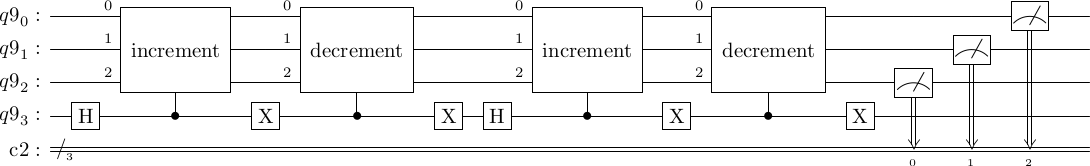

In [16]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Initialize a quantum register with 4 qubits
qr = QuantumRegister(4)

# Initialize a classical register with 3 bits
cr = ClassicalRegister(3)

# Create the main quantum circuit with the defined quantum and classical registers
qc = QuantumCircuit(qr, cr)

# -------------------------
# Initialize  the 'increment' sub-circuit as defined previously.
# -------------------------

sub_q1 = QuantumRegister(3)  # Initialize a 3-qubit register for the increment sub-circuit
sub_circ1 = QuantumCircuit(sub_q1, name='increment')
sub_circ1.ccx(sub_q1[2], sub_q1[1], sub_q1[0])
sub_circ1.cx(sub_q1[2], sub_q1[1])
sub_circ1.x(sub_q1[2])

# Convert the 'increment' sub-circuit to a controlled gate
incr = sub_circ1.to_gate().control(1)

# -------------------------
# Initialize  the 'decrement' sub-circuit as defined previously.
# -------------------------

sub_q2 = QuantumRegister(3)  # Initialize a 3-qubit register for the decrement sub-circuit
sub_circ2 = QuantumCircuit(sub_q2, name='decrement')  # Create the decrement sub-circuit

sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])
sub_circ2.ccx(sub_q2[2], sub_q2[1], sub_q2[0])
sub_circ2.x(sub_q2[1])
sub_circ2.x(sub_q2[2])
sub_circ2.x(sub_q2[2])
sub_circ2.cx(sub_q2[2], sub_q2[1])  
sub_circ2.x(sub_q2[2])
sub_circ2.x(sub_q2[2])

# Convert the 'decrement' sub-circuit to a controlled gate
decr = sub_circ2.to_gate().control(1)

# -------------------------
# Add gates to the main quantum circuit (Step 1)
# -------------------------

qc.h(3)  # Apply a Hadamard gate to qr[3], creating superposition

# Apply the 'increment' controlled gate to qr[3], qr[0], qr[1], and qr[2]
qc.append(incr, [qr[3], qr[0], qr[1], qr[2]])

# Apply X gates so the decrement gate is activated when the control qubit is 0.
qc.x(3)
qc.append(decr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3) 

# -------------------------
# Add gates to the main quantum circuit (Step 2)
# -------------------------

qc.h(3)  # Apply a Hadamard gate to qr[3], creating superposition

# Apply the 'increment' controlled gate to qr[3], qr[0], qr[1], and qr[2]
qc.append(incr, [qr[3], qr[0], qr[1], qr[2]])

# Apply X gates so the decrement gate is activated when the control qubit is 0.
qc.x(3)
qc.append(decr, [qr[3], qr[0], qr[1], qr[2]])
qc.x(3) 

# Measure qr[2], qr[1], and qr[0] and store the results in the classical register cr
qc.measure([qr[2], qr[1], qr[0]], cr)

# Visualize the circuit.
qc.draw('latex')

In the previous code, we only apply the Hadmard gate on the coin qubit once before applying the shift operator $S$ $n$ times for an $n$-step random walk. For the code above, we apply a Hadmard gate before the shift operator $S$ in every step. With this small modification, every position has its own coin coupled to it through quantum entanglement. The person, at every position, flips its own coin and moves left or right (at the same time, due to superposition), leading to constructive and destructive interference of the possibility amplitude.

We again run a version with maximum distance of $63$. Notice how the result plot is different from the above one. For the analytical calculation, please refer to the Appendix A of our paper.

{'1011000': 4, '1101010': 29, '0010100': 24, '1010100': 7, '0011000': 176, '1100110': 1, '0011100': 38, '1101100': 12, '0010110': 95, '1011110': 3, '0011010': 59, '1100100': 17, '0100000': 43, '0111100': 20, '0100100': 41, '0110100': 22, '0101100': 23, '0100010': 27, '0111110': 13, '0101000': 21, '0011110': 48, '1100000': 19, '0111000': 14, '0110110': 9, '0101010': 32, '0111010': 11, '0100110': 12, '1011010': 24, '1101000': 26, '1001100': 9, '1011100': 17, '1010110': 4, '1000010': 5, '1001000': 4, '0101110': 12, '0110010': 14, '1000110': 12, '1001110': 9, '1000000': 12, '1010000': 8, '1010010': 10, '0110000': 12, '1000100': 9, '1001010': 10, '0010010': 2, '1100010': 4, '1101110': 1}


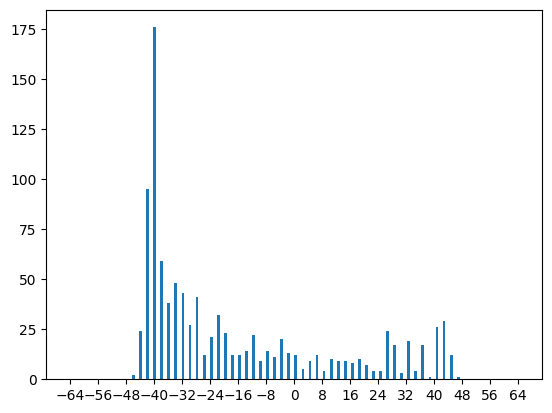

In [17]:
l = 7         # l shows the maximum distance. The maximum distance you can go away from the center point is 2^l.
n = 60        # n here is the step number you want. n is smaller than 2^l.

# Create a quantum circuit with l+1 quantum qubits and l classical bits
qr = QuantumRegister(l + 1) 
cr = ClassicalRegister(l)
qc = QuantumCircuit(qr, cr)

# -------------------------
# Define the 'increment' sub-circuit. Details about this sub-circuit can be referred to explanations earlier in this document.
# -------------------------
sub_q1 = QuantumRegister(7)
sub_circ1 = QuantumCircuit(sub_q1, name='increment')
sub_circ1.mcx([sub_q1[6], sub_q1[5], sub_q1[4], sub_q1[3], sub_q1[2], sub_q1[1]], sub_q1[0])
sub_circ1.mcx([sub_q1[6], sub_q1[5], sub_q1[4], sub_q1[3], sub_q1[2]], sub_q1[1])
sub_circ1.mcx([sub_q1[6], sub_q1[5], sub_q1[4], sub_q1[3]], sub_q1[2])
sub_circ1.mcx([sub_q1[6], sub_q1[5], sub_q1[4]], sub_q1[3])
sub_circ1.ccx(sub_q1[6], sub_q1[5], sub_q1[4])
sub_circ1.cx(sub_q1[6], sub_q1[5])
sub_circ1.x(sub_q1[6])

incr = sub_circ1.to_gate().control(1)


# -------------------------
# Define the 'decrement' sub-circuit. Details about this sub-circuit can be referred to explanations earlier in this document.
# -------------------------

sub_q2 = QuantumRegister(7)
sub_circ2 = QuantumCircuit(sub_q2, name='decrement')

sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])
sub_circ2.x(sub_q2[1])
sub_circ2.mcx([sub_q2[6], sub_q2[5], sub_q2[4], sub_q2[3], sub_q2[2], sub_q2[1]], sub_q2[0])
sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])
sub_circ2.x(sub_q2[1])

sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])
sub_circ2.mcx([sub_q2[6], sub_q2[5], sub_q2[4], sub_q2[3], sub_q2[2]], sub_q2[1])
sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.x(sub_q2[2])

sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])
sub_circ2.mcx([sub_q2[6], sub_q2[5], sub_q2[4], sub_q2[3]], sub_q2[2])
sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.x(sub_q2[3])

sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])
sub_circ2.mcx([sub_q2[6], sub_q2[5], sub_q2[4]], sub_q2[3])
sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.x(sub_q2[4])

sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])
sub_circ2.ccx(sub_q2[6], sub_q2[5], sub_q2[4])
sub_circ2.x(sub_q2[6])
sub_circ2.x(sub_q2[5])

sub_circ2.x(sub_q2[6])
sub_circ2.cx(sub_q2[6], sub_q2[5])
sub_circ2.x(sub_q2[6])

sub_circ2.x(sub_q2[6])

decr = sub_circ2.to_gate().control(1)

# -------------------------
# Main circuit.
# -------------------------
qc.x(0) # This line of codes ensures a center point in the middle of the bar graph, instead of using origin as the classic case.

# We use a for loop to repeat the trial n times.
for temp3 in range(n): 
    qc.h(l) # Set up the 'coin'
    qc.append(incr, [qr[7], qr[0], qr[1], qr[2], qr[3], qr[4], qr[5], qr[6]]) 
    # Add the increment gate to the circuit with a control operation at the 'coin' qubit. If the coin flips 1, the increment sub-circuit increases the count by 1 just like the classic circuit.
    qc.x(l)
    qc.append(decr, [qr[7], qr[0], qr[1], qr[2], qr[3], qr[4], qr[5], qr[6]])
    qc.x(l)

qc.measure([qr[6], qr[5], qr[4], qr[3], qr[2], qr[1], qr[0]], cr) 
# Add the increment gate to the circuit with a control operation detecting 0 at the 'coin' qubit. If the coin flips 0, the decrement sub-circuit decreases the count by 1 just like the classic circuit.

# Run the simulation with Qiskit's real quantum computer simulator.
backend = Aer.get_backend('qasm_simulator')
shots = 1024
transpiled_qc = transpile(qc, backend)
job = backend.run(transpiled_qc, shots=shots)
result = job.result()
results = result.get_counts()
print(results)

# Plot the results with matplotlib.
draw(l, results)
plt.xticks(np.linspace(-2 ** (l-1), 2 ** (l - 1), 17));

Here is a comparison of probability distributions from classical and quantum random walks. It is intended as a qualitative illustration: interference effects in the quantum walk lead to pronounced peaks, in contrast with the smooth, binomial-like spread of the classical walk.

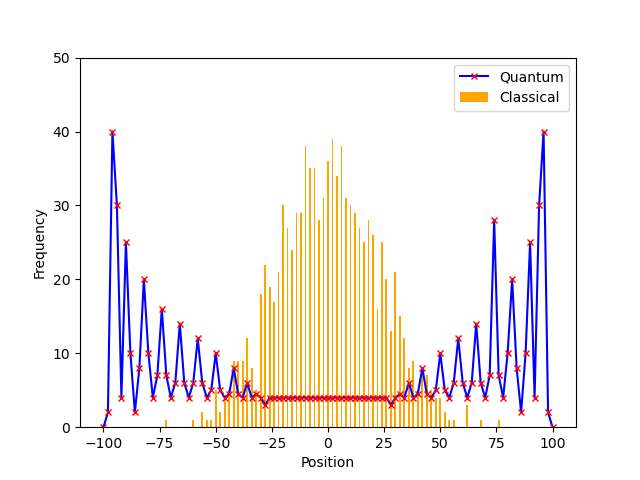

The results of the quantum algorithm differ significantly from those predicted by the classical algorithm. In the classical scenario, the man is expected to return to his original starting point after many steps, reflecting an equal probability of moving left or right. However, our quantum algorithm shows a surprising result: the man is found at the farthest possible position from the origin, either on the left or right.

This stark difference arises from the use of the Hadamard gate instead of a pseudo-random coin flip. While the classical algorithm relies on pseudo-randomness, the Hadamard gate introduces genuine quantum superposition, allowing the man to explore both directions simultaneously. The interference effects inherent to quantum mechanics push the system toward extreme positions.

## 3. Ising Model

### 0. Ising Model in 1D without external field



The 1D Ising model without an external magnetic field is a simple yet foundational system in statistical physics. It consists of a chain of spins, where each spin can be in one of two states, $+1$ or $-1$, interacting only with its nearest neighbors. The model's Hamiltonian is given by:

\begin{equation}
H = -J \sum_{i=1}^{N-1} s_i s_{i+1}
\end{equation}

where $J$ is the coupling constant that determines the interaction strength. If $J > 0$, the model is ferromagnetic, favoring parallel alignment of spins, while $J < 0$ represents an antiferromagnetic interaction, favoring anti-alignment. Despite its simplicity, the 1D Ising model has no phase transition at finite temperature due to the dominance of thermal fluctuations, which prevent long-range order. However, at absolute zero $T = 0$, the system achieves complete spin alignment in the ground state, demonstrating trivial long-range order.


### 1. Classical Algorithm

We apply the Metropolis algorithm to simulate the 1D Ising model. In this algorithm, each spin is evaluated based on specific flipping rules that determine whether the spin should flip or remain unchanged. The outcome is recorded after each iteration. This process is repeated for a large number of iterations to analyze the statistical distribution of spin configurations. Below is an example code for the 1D Ising model without an external magnetic field.


Normally, we use $0$s and $1$s to indicate spins pointing upward and downward. This notation is not suitable for this question as $0$ times everything returns $0$. Instead, we use $1$ for spins pointing upward and $-1$ for spins pointing downward. This new notation applies to both the classical algorithms and the quantum algorithms.

In [16]:
# Define a function to calculate the total energy of the spin configuration.
def energy(spin, J):
    E = 0  # Initialize energy to zero.
    # Loop through each spin and calculate the interaction energy.
    for i in range(0, len(spin)):
        E += spin[i-1] * spin[i]  # Add interaction energy between neighboring spins.
    E = -J * E  # Multiply by -J to get the total energy of the configuration.
    return E  # Return the total energy.

# Define a function to calculate the change in energy when flipping a specific spin.
def deltaE(spin, ind, J):
    temp = spin.copy()  # Create a copy of the current spin configuration.
    temp[ind] = temp[ind] * (-1)  # Flip the spin at the given index.
    # Calculate the change in energy by comparing the new and old configurations.
    dE = energy(temp, J) - energy(spin, J)
    return dE  # Return the change in energy.

0.03442835807800293 seconds
{'[1, 1, 1, -1]': 70, '[-1, -1, -1, -1]': 508, '[1, -1, -1, -1]': 253, '[1, 1, -1, -1]': 116, '[1, 1, 1, 1]': 53}


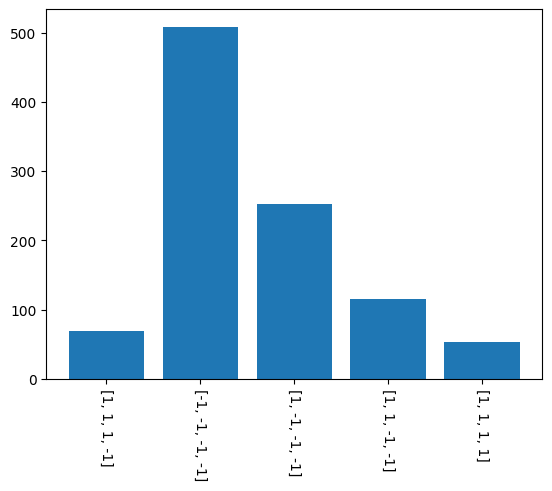

In [17]:
# Set up main functions for the Metropolis algorithm.

dyct = {}  # Initialize an empty dictionary to store the distribution of spin configurations.

N = 4  # Number of spins in the 1D Ising model; can be adjusted as needed.
J = -0.25 * np.log(0.5)  # Coupling constant; adjusted to favor anti-alignment in this example.
T = 1  # Temperature parameter; can be changed to study different thermal behaviors.

start = time()  # Start timing the simulation.

# Perform 1000 iterations to gather statistics on spin configurations.
for j in range(1000):
    spins = [1, 1, 1, 1]  # Initialize the spin configuration; all spins set to 1 initially.
    # Loop through each spin in the current configuration.
    for i in range(len(spins)):
        index = i  # Set the index of the spin to be tested.
        # Calculate the change in energy if the spin is flipped.
        # If deltaE is negative (energy decreases), flip the spin.
        # If deltaE is positive, flip the spin with probability exp(-deltaE/T).
        if deltaE(spins, index, J) <= 0 or (deltaE(spins, index, J) > 0 and random.random() < np.exp(-deltaE(spins, index, J)/T)):
            spins[index] = spins[index] * (-1)  # Flip the spin at the specified index.
    # Record the final spin configuration in the dictionary.
    encode(dyct, spins)

# Print the total simulation time.
print(float(time() - start), 'seconds')

# Print the final distribution of spin configurations.
print(dyct)

# Plot the distribution of spin configurations using a bar chart.
plotdyct(dyct)

We also provide a sample code for 2-dimensional Ising model. In this case, a spin interacts with its four nearest neighbors.

In [18]:
# Define a function to calculate the energy of a given spin in the lattice.
def calculate_energy(s, rindex, cindex):
    energy = 0  # Initialize the energy to zero.
    # Calculate the interaction energy of the spin at (rindex, cindex) with its four neighbors.
    # The neighbors include the spin above, below, to the left, and to the right.
    # The modulo operator (%) handles periodic boundary conditions, ensuring the lattice 'wraps around'.
    energy = -J * s[rindex][cindex] * (
        s[rindex - 1][cindex] +  # Neighbor above.
        s[(rindex + 1) % L][cindex] +  # Neighbor below (with periodic boundary condition).
        s[rindex][(cindex + 1) % L] +  # Neighbor to the right (with periodic boundary condition).
        s[rindex][cindex - 1]  # Neighbor to the left.
    )
    return energy  # Return the calculated energy.

# Define a function to calculate the change in energy when flipping a specific spin in the lattice.
def deltaEnergy(s, rindex, cindex):
    temps = copy.deepcopy(s)  # Create a deep copy of the spin configuration to avoid modifying the original lattice.
    temps[rindex][cindex] = -1 * temps[rindex][cindex]  # Flip the spin at the specified position.
    # Calculate the change in energy by comparing the new and original configurations.
    return calculate_energy(temps, rindex, cindex) - calculate_energy(s, rindex, cindex)

0.2252647876739502 seconds
{'[[-1, 1, -1], [1, -1, -1], [-1, -1, -1]]': 269, '[[-1, 1, -1], [1, -1, -1], [-1, -1, 1]]': 259, '[[-1, 1, -1], [1, 1, -1], [-1, -1, 1]]': 252, '[[-1, 1, -1], [1, 1, -1], [-1, -1, -1]]': 220}


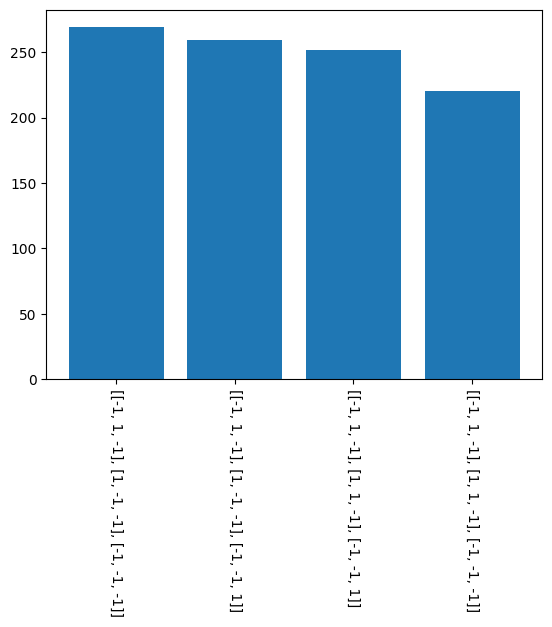

In [19]:
# Define parameters
J = -0.125 * np.log(0.5)  # Coupling constant that determines the strength of spin interactions.
k_B = 1.0  # Boltzmann constant, used for calculating thermal effects.
T = 1.0  # Temperature of the system.
L = 3  # Lattice size, indicating the dimension of the 2D spin lattice.
N = L**2  # Total number of spins in the lattice (L x L).
n_steps = 1000  # Number of Monte Carlo simulation steps.
dyct = {}  # Initialize a dictionary to store the distribution of spin configurations.

# Initialize the lattice with a predefined configuration.
# Uncomment the below line for a random initial configuration:
# s = np.random.choice([-1, 1], size=(L, L)).
# Alternatively, use a uniform configuration with all spins up:
# s = [[1 for col in range(L)] for row in range(L)]
s = [[1, -1, 1], [-1, 1, 1], [1, 1, -1]]  # Predefined initial configuration of the lattice.

start = time()  # Start timing the simulation.

# Monte Carlo simulation using the Metropolis algorithm.
for step in range(n_steps):
    # Create a deep copy of the lattice to avoid modifying the original configuration.
    st = copy.deepcopy(s)
    
    # Loop through each spin in the lattice.
    for i in range(L):
        for j in range(L):
            # Calculate the change in energy if the spin at (i, j) is flipped.
            # If deltaEnergy is less than or equal to 0, flip the spin (energy decreases).
            if deltaEnergy(st, i, j) <= 0:
                st[i][j] = -1 * st[i][j]  # Flip the spin at (i, j).
            else:
                # If deltaEnergy is positive, flip the spin with probability exp(-deltaE/(k_B * T)).
                if random.random() < np.exp(-deltaEnergy(st, i, j) / (k_B * T)):
                    st[i][j] = -1 * st[i][j]  # Flip the spin at (i, j).

    # Add the resulting spin configuration to the distribution dictionary.
    encode(dyct, st)

# Print the total simulation time.
print(float(time() - start), 'seconds')

# Print the distribution of spin configurations.
print(dyct)

# Plot the distribution of spin configurations using a bar chart.
plotdyct(dyct)

### 2. Quantum Algorithm

Analyzing the equation for energy, we find that the change in energy due to a spin flip depends solely on the spin itself and its two neighboring spins. Upon closer inspection, we observe that a positive energy change occurs only when the spin aligns with both of its neighbors (either all spins up or all spins down).

Using this principle, we developed a simulation of the 1D Ising model using Qiskit, based on the algorithm described in the paper 'An Algorithm for Simulating the Ising Model on a Type-II Computer,' by J.H. Cole, L.C.L. Hollenberg, and S. Prawer, published in 2004. The following graph from the paper illustrates the construction of the corresponding quantum circuit.

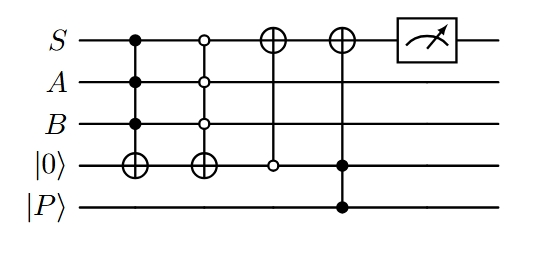

In the circuit diagram above, gates with black dots represent the traditional CCCX gate (Toffoli gate), where the target qubit is flipped only when all three control qubits are in the $|1\rangle$ state (in our example, spin-down). Gates with white dots represent the reversed CCCX gate, which flips the target qubit when all three control qubits are in the $|0\rangle$ state (spin up). This circuit is applied to each spin in the system, and the final configurations are recorded. The process is repeated multiple times, similar to the Monte Carlo method. The implementation of this circuit is shown below.

In [20]:
# Define a function for Ising interaction simulation.
# This function determines whether the ith spin will be flipped.
def isingAlgorithm(index):
        
    qc = QuantumCircuit(q, c)  # Initialize a quantum circuit with the given quantum and classical registers.

    # Apply a single-qubit gate (u) to q[4] to initialize the probability of a flip in case of a positive energy change.
    qc.u(2 * np.arccos(np.sqrt(1 - P)), 0, 0, q[4])

    # Prepare the initial state based on the spin configuration.
    if spins[index] == 1:
        qc.x(q[0])  # Flip q[0] if the spin at the given index is up (1).

    if spins[index - 1] == 1:
        qc.x(q[1])  # Flip q[1] if the previous spin is up (1).

    if spins[(index + 1) % len(spins)] == 1:
        qc.x(q[2])  # Flip q[2] if the next spin is up (1).

    # Apply a multi-controlled X (MCX) gate
    qc.mcx([q[0], q[1], q[2]], q[3])  # Flip the scratech qubit |0> if all three spins are up.

    # Apply another MCX gate detecting 0s. Flip the scratech qubit |0> if all three spins are up.
    for temp4 in range(3):
        qc.x(q[temp4])
    qc.mcx([q[0], q[1], q[2]], q[3])
    for temp5 in range(3):
        qc.x(q[temp5])

    # If the scratch qubit is not flipped, then the three spins' configuration 
    # is one of the six situations that will lead to a non-positive energy change.
    qc.x(q[3])
    qc.cx(q[3], q[0])
    qc.x(q[3])

    # If the scratch qubit is flipped, then flipping the ith qubit will lead
    # lead to a positive energy change. We flip it with probability P.
    qc.ccx(q[4], q[3], q[0])

    # Measure the state of q[0] and store the result in the classical register c.
    qc.measure(q[0], c)
    backend = Aer.get_backend('qasm_simulator')  # Set the backend to the QASM simulator.
    shots = 1  # Set the number of shots to 1 for this simulation.

    # Transpile the circuit for the chosen backend.
    transpiled_qc = transpile(qc, backend)

    # Run the transpiled circuit.
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()

    # Get the measurement results.
    counts = result.get_counts()
    newstat = int(list(counts.keys())[0])  # Convert the measured result to an integer.
    
    # Update the spin configuration based on the measurement result.
    if newstat == 1:
        spins[index] = 1  # Set the spin at the current index to up (1).
    elif newstat == 0:
        spins[index] = -1  # Set the spin at the current index to down (-1).

73.12722945213318 seconds
{'[-1, -1, -1, -1]': 42, '[1, 1, 1, 1]': 12, '[1, -1, -1, -1]': 27, '[1, 1, 1, -1]': 6, '[1, 1, -1, -1]': 13}


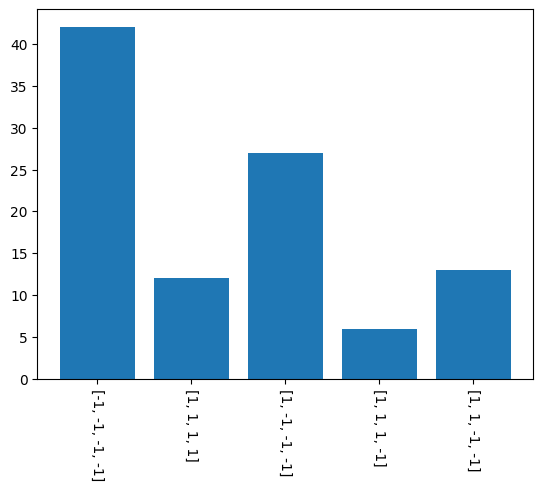

In [21]:
start = time()  # Start timing the simulation.

dyct = {}  # Initialize a dictionary to store the distribution of final spin configurations.

# Set parameters for the simulation.
J = -0.25 * np.log(0.5)  # Coupling strength, determining the interaction between spins.
T = 1  # Temperature of the system, influencing thermal fluctuations.

# Calculate the probability factor for spin flipping, based on the Boltzmann distribution.
P = np.exp(-4 * J / T)  # Probability of flipping a spin, given the energy change and temperature.

# Set the number of trials for the Monte Carlo simulation.
trialnumbers = 100  # Number of times the spin configuration will be evaluated.

# Initialize the quantum circuit.
q = QuantumRegister(5)  # Create a quantum register with 5 qubits.
c = ClassicalRegister(1)  # Create a classical register with 1 bit for measurement.
qc = QuantumCircuit(q, c)  # Create a quantum circuit with the defined registers.

# Initialize the spin configuration; all spins start in the up (1) state.
inispins = [1, 1, 1, 1]  # Initial configuration of spins.

# Perform the Monte Carlo simulation for the specified number of trials.
for totalloop in range(trialnumbers):
    
    spins = inispins.copy()  # Copy the initial spin configuration for each trial.
    
    # Loop through each spin in the current configuration.
    for branchloop in range(len(spins)):
        isingAlgorithm(branchloop)  # Apply the Ising interaction algorithm to each spin.

    # Record the final spin configuration in the distribution dictionary.
    encode(dyct, spins)

# Print the total simulation time.
print(float(time() - start), 'seconds')

# Print the distribution of spin configurations.
print(dyct)

# Plot the distribution of spin configurations using a bar chart.
plotdyct(dyct)

For the 2-dimensional Ising model, as outlined in the Cole et al. 2004 paper, we can perform a similar operation on the lattice by evaluating each spin individually. The corresponding quantum circuit for this approach is illustrated as follows:

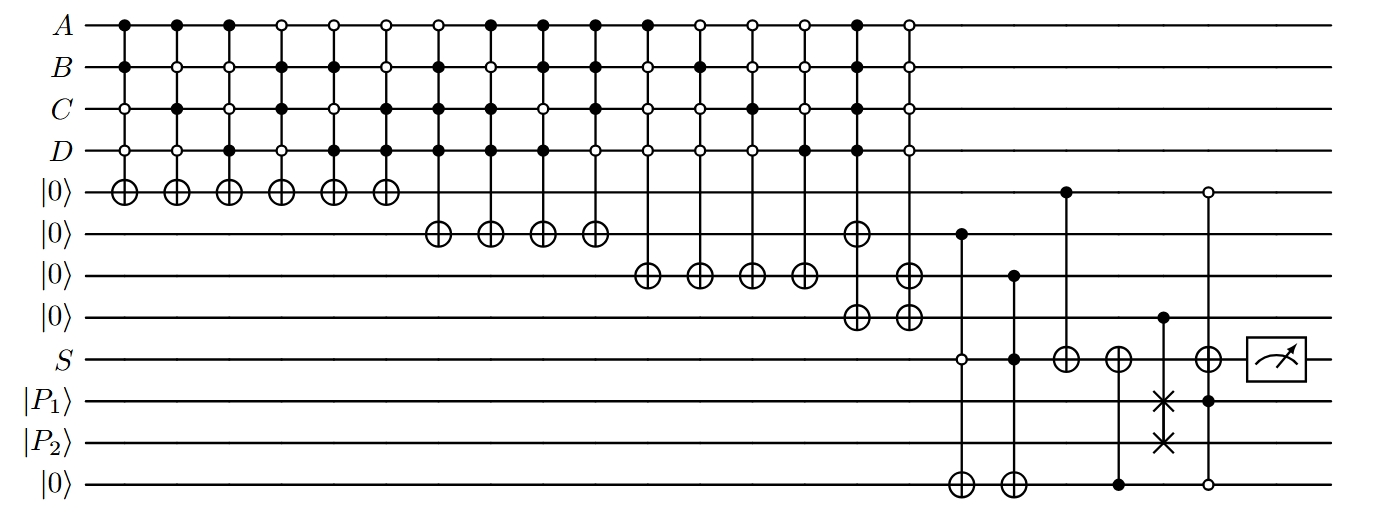

In [22]:
# Define a quantum circuit for simulating the 2D Ising model without an external magnetic field
# The function determines whether the spin S with coordinate i(row index, rindex), j(column index, cindex) will be flipped.
# A, B, C, D refer to the spin S's neighbors in the order of:
#     B
#  D  S  C
#     A
def twoDwithoutH(rindex, cindex):
    
    # Initialize the quantum circuit with quantum and classical registers.
    qc = QuantumCircuit(q, c)
    
    # Apply U gates to q[9] and q[10] to create superposition with probabilities P1 and P2.
    qc.u(2 * np.arccos(np.sqrt(1 - P1)), 0, 0, q[9])
    qc.u(2 * np.arccos(np.sqrt(1 - P2)), 0, 0, q[10])

    # Prepare the |S> with initial state based on the spin configuration
    if spins[rindex][cindex] == 1:
        qc.x(q[8])  # Flip q[8] if the current spin is up.

    # Initialize S's neighbor spins.
    if spins[(rindex + 1) % L][cindex] == 1:
        qc.x(q[0])  # Flip q[0] if the spin below is up (using periodic boundary conditions).
    if spins[rindex - 1][cindex] == 1:
        qc.x(q[1])  # Flip q[1] if the spin above is up.
    if spins[rindex][(cindex + 1) % L] == 1:
        qc.x(q[2])  # Flip q[2] if the spin to the right is up (using periodic boundary conditions).
    if spins[rindex][cindex - 1] == 1:
        qc.x(q[3])  # Flip q[3] if the spin to the left is up.

    # Series of multi-controlled X (MCX) operations for interaction terms.

    # 4 spins can have 16 different configurations in total. We use MCX gates to categorize them first.
    # If only 2 of the 4 neighbor spins are up, we record this type of configuration on the first |0> qubit.
    # Up and Down neighbors are up.
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[4])
    qc.x(q[2])
    qc.x(q[3])

    # Down and Right neighbors are up.
    qc.x(q[1])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[4])
    qc.x(q[1])
    qc.x(q[3])

    # Down and Left neighbors are up.
    qc.x(q[1])
    qc.x(q[2])
    qc.mcx([q[0], q[1], q[2], q[3]], q[4])
    qc.x(q[1])
    qc.x(q[2])

    # Up and Right neighbors are up.
    qc.x(q[0])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[4])
    qc.x(q[0])
    qc.x(q[3])

    # Up and Left neighbors are up.
    qc.x(q[0])
    qc.x(q[2])
    qc.mcx([q[0], q[1], q[2], q[3]], q[4])
    qc.x(q[0])
    qc.x(q[2])

    # Left and Right neighbors are up.
    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[2], q[3]], q[4])
    qc.x(q[0])
    qc.x(q[1])

    # If only 3 of the 4 neighbor spins are up, we record this type of configuration on the second |0> qubit.
    # Up, Left and Right neighbors are up.
    qc.x(q[0])
    qc.mcx([q[0], q[1], q[2], q[3]], q[5])
    qc.x(q[0])

    # Down, Left and Right neighbors are up.
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[2], q[3]], q[5])
    qc.x(q[1])

    # Up, Down and Left neighbors are up.
    qc.x(q[2])
    qc.mcx([q[0], q[1], q[2], q[3]], q[5])
    qc.x(q[2])

    # Up, Down and Right neighbors are up.
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[5])
    qc.x(q[3])

    # If only 1 of the 4 neighbor spins is up, we record this type of configuration on the third |0> qubit.
    # Down spin is up.
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[6])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])

    # Up spin is up.
    qc.x(q[0])
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[6])
    qc.x(q[0])
    qc.x(q[2])
    qc.x(q[3])

    # Right spin is up.
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[6])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[3])

    # Left spin is up.
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.mcx([q[0], q[1], q[2], q[3]], q[6])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])

    # If all 4 spins are up, we record this type of configuration on the second and fourth |0> qubit.
    qc.mcx([q[0], q[1], q[2], q[3]], q[5])
    qc.cx(q[5], q[7])

    # If all 4 spins are down, we record this type of configuration on the third and fourth |0> qubit.
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[6])
    qc.cx(q[6], q[7])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])

    # If 3 neighbor spins are up and the S is down, there will be a non-positive energy change. We record that on the last |0> qubit. 
    qc.x(q[8])
    qc.ccx(q[5], q[8], q[11])
    qc.x(q[8])

    # If 1 neighbor spin is up and the S is up, there will be a non-positive energy change. We record that on the last |0> qubit. 
    qc.ccx(q[6], q[8], q[11])

    # If 2 neighbor spins are up, no matter whether S is up or down, there will be a non-positive energy change after the flip. We flip S in this case.
    qc.cx(q[4], q[8])

    # If the configuration is either 3 neighbor spins up and S down, or 1 neighbor spin up and S up, there is a non-positive energy
    # change after the flip. We flip S.
    qc.cx(q[11], q[8])

    # Flip the probability P1 and P2 if all the spins are up or down.
    qc.cswap(q[7], q[9], q[10])

    # If all spins are up or down, there will be a +8J energy change. Otherwise, other situations will only bring a +4J energy change.
    qc.x(q[4])
    qc.x(q[11])
    qc.mcx([q[4], q[9], q[11]], q[8])
    qc.x(q[4])
    qc.x(q[11])

    # Measure the center S spin for its final configuration.
    qc.measure(q[8], c)

    # Set the backend to QASM simulator and define the number of shots.
    backend = Aer.get_backend('qasm_simulator')
    shots = 1

    # Transpile the circuit for the chosen backend.
    transpiled_qc = transpile(qc, backend)

    # Run the transpiled circuit
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()

    # Retrieve the measurement results.
    counts = result.get_counts()

    # Get the measurement result and update the spin configuration.
    newstat = int(list(counts.keys())[0])
    if newstat == 1:
        spins[rindex][cindex] = 1  # Set the spin to up (1).
    elif newstat == 0:
        spins[rindex][cindex] = -1  # Set the spin to down (-1).

171.18258118629456 seconds
{'[[-1, 1, -1], [1, -1, -1], [-1, -1, 1]]': 27, '[[-1, 1, -1], [1, 1, -1], [-1, -1, -1]]': 24, '[[-1, 1, -1], [1, 1, -1], [-1, -1, 1]]': 27, '[[-1, 1, -1], [1, -1, -1], [-1, -1, -1]]': 22}


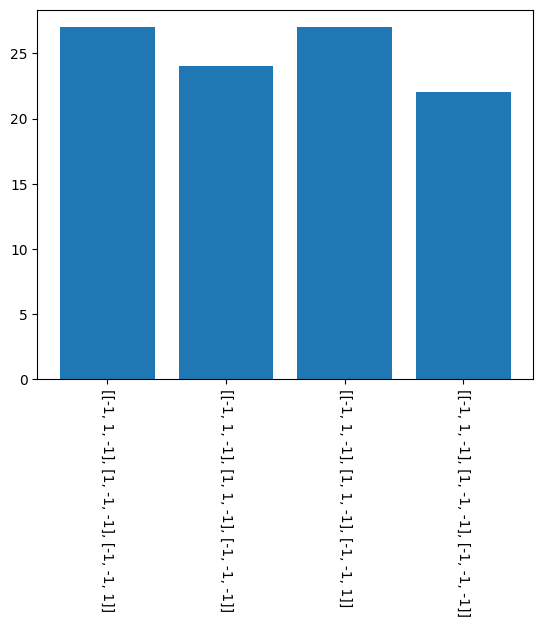

In [23]:
start = time()  # Start timing the simulation.

# Set Parameters for the Ising model simulation.
J = -0.125 * np.log(0.5)  # Coupling strength, determining interaction between neighboring spins.
T = 1  # Temperature of the system, influencing spin flipping probabilities.
L = 3  # Dimensions of the lattice (3x3 grid).
dyct = {}  # Initialize dictionary to record the distribution of spin configurations.

# Calculate probabilities for spin flipping based on energy change and temperature.
P1 = np.exp(-4 * J / T)  # Probability for single-spin energy change.
P2 = np.exp(-8 * J / T)  # Probability for two-spin energy change.

# Initialize the quantum circuit with 12 qubits and 1 classical bit for measurement.
q = QuantumRegister(12)  # Quantum register for the circuit.
c = ClassicalRegister(1)  # Classical register to store measurement results.
qc = QuantumCircuit(q, c)  # Create the quantum circuit using the registers.

# Main loop to repeat the Ising model simulation.
for t in range(100):  # Run 100 simulation trials
    spins = s = [[1, -1, 1], [-1, 1, 1], [1, 1, -1]]  # Initialize spin configuration.

    # Nested loop to apply the 2D Ising model on each lattice position.
    for temp10 in range(L):  # Loop over each row
        for temp11 in range(L):  # Loop over each column
            twoDwithoutH(temp10, temp11)  # Apply the twoDwithoutH function to update spins.

    # Record the resulting spin configuration in the dictionary.
    encode(dyct, spins)

# Print the total simulation time.
print(float(time() - start), 'seconds')

# Print the recorded distribution of spin configurations.
print(dyct)

# Plot the distribution of configurations using a bar chart.
plotdyct(dyct)

The circuit above can be optimized by treating the 2D Ising model as two separate 1D Ising models. The first 1D Ising model involves the $\textbf{upper neighbor, middle spin, and lower neighbor}$, while the second involves the $\textbf{left neighbor, middle spin, and right neighbor}$. The energy of a 2D Ising system can be expressed as:

\begin{equation}
E = -J (S \cdot A + S \cdot B + S \cdot C + S \cdot D)
\end{equation}

where $S$ is the middle spin, $A$ and $D$ are the upper and lower neighbors, and $B$ and $C$ are the left and right neighbors, respectively.

This expression can be decomposed into two 1D Ising models: $\textbf{Vertical 1D Ising Model}$:

\begin{equation}
S \cdot A + S \cdot D,
\end{equation}

and the $\textbf{Horizontal 1D Ising Model}$:

\begin{equation}
S \cdot B + S \cdot C
\end{equation}

In this framework, the total energy change can be analyzed based on specific configurations. If both the vertical and horizontal orientations consist of either all up spins or all down spins, the energy change will be positive. However, if one orientation has consecutive up or down spins while the other has opposite spins, the energy change will be zero.

Here’s why this happens:

In the initial configuration, the $\textbf{vertical 1D Ising model}$ might show a positive energy change, while the $\textbf{horizontal model}$ shows zero energy change.
After a spin flip, the $\textbf{vertical model}$ transitions to zero energy change, while the $\textbf{horizontal model}$ experiences a positive energy change.


This ensures that the total energy of the system remains conserved. The optimized circuit diagram for this approach is illustrated below:


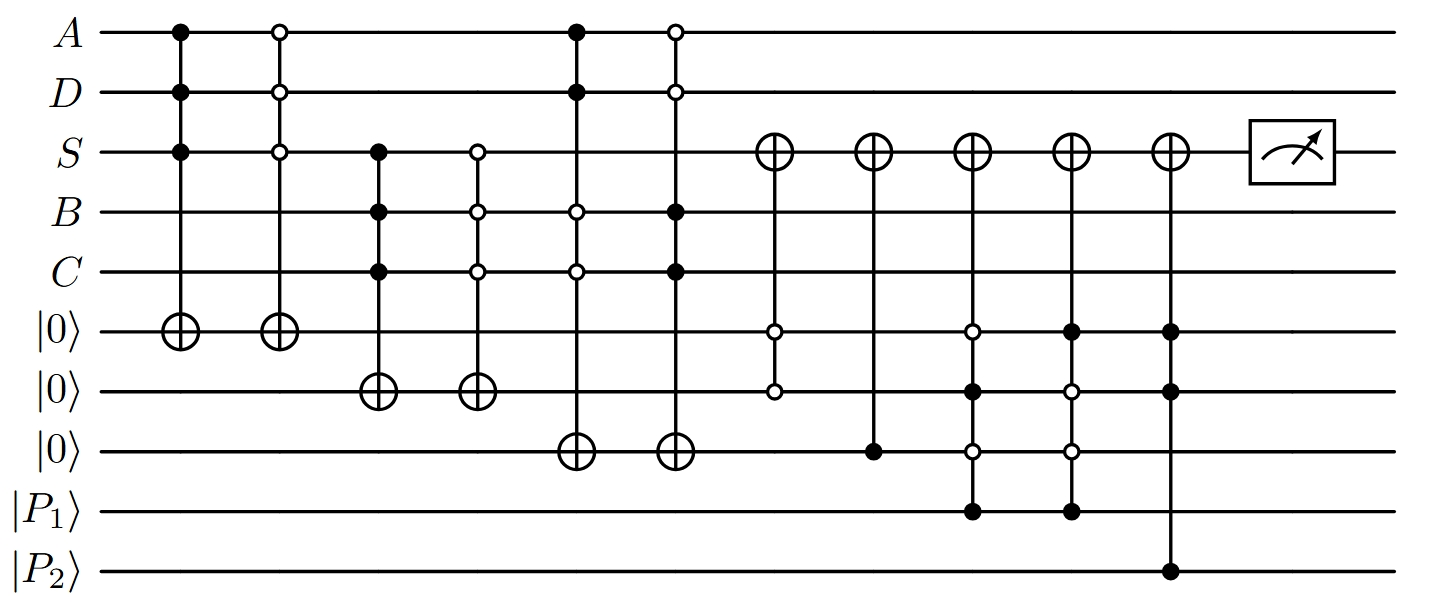

In [24]:
# Define the function for the 2D Ising model interaction without an external magnetic field
# The spin configuraytion is:
#      A
#    B S C
#      D
def withoutH21D(rindex, cindex):
    
    # Initialize the quantum circuit with quantum and classical registers.
    qc = QuantumCircuit(q, c)
    
    # Apply U gates to q[8] and q[9] to create superpositions based on probabilities P1 and P2.
    qc.u(2 * np.arccos(np.sqrt(1 - P1)), 0, 0, q[8])
    qc.u(2 * np.arccos(np.sqrt(1 - P2)), 0, 0, q[9])

    # Set up the initial spin configuration based on the input lattice state.
    if spins[rindex][cindex] == 1:
        qc.x(q[2])  # Flip q[2] if the spin at (i, j) is up.
    if spins[(rindex - 1) % L][cindex] == 1:
        qc.x(q[0])  # Flip q[0] if the spin above is up (periodic boundary condition).
    if spins[(rindex + 1) % L][cindex] == 1:
        qc.x(q[1])  # Flip q[1] if the spin below is up (periodic boundary condition).
    if spins[rindex][(cindex - 1) % L] == 1:
        qc.x(q[3])  # Flip q[3] if the spin to the left is up (periodic boundary condition).
    if spins[rindex][(cindex + 1) % L] == 1:
        qc.x(q[4])  # Flip q[4] if the spin to the right is up (periodic boundary condition).

    # Series of operations for interaction terms between spins.

    # Flip first |0> qubit if the 3 spins in a row are in the same configuration.
    # All spins in a row are up.
    qc.mcx([q[0], q[1], q[2]], q[5])

    # All spins in a row are down.
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.mcx([q[0], q[1], q[2]], q[5])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    
    # All spins in a column are up.
    qc.mcx([q[2], q[3], q[4]], q[6])

    # Flip second |0> qubit if the 3 spins in a column are of the same configurations.
    # All spins in a column are down.
    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.mcx([q[2], q[3], q[4]], q[6])
    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    
    # Flip the third |0> qubit if only 2 neighbor spins in the same row or the same column are both up. This are the 2 special situations.
    # If we treat the 2D ising model as 2 1D ising model, then this situation should bring a positive energy change, but in fact, they exchange
    # configurations and result in a 0 energy change.
    qc.x(q[3])
    qc.x(q[4])
    qc.mcx([q[0], q[1], q[3], q[4]], q[7])
    qc.x(q[3])
    qc.x(q[4])
    
    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[3], q[4]], q[7])
    qc.x(q[0])
    qc.x(q[1])
    
    # If the S spin doesn't have the same spin with its row or column neighbors, there will be a non-positive energy change, we flip S.
    qc.x(q[5])
    qc.x(q[6])
    qc.ccx(q[5], q[6], q[2])
    qc.x(q[5])
    qc.x(q[6])
    
    # If the configuration is one of the 2 special situations, we flip S since the energy change is 0. 
    qc.cx(q[7], q[2])
    
    # Operation 9: Flip q[2] based on a multi-controlled X involving q[5], q[6], and q[9]
    qc.mcx([q[5], q[6], q[9]], q[2])
    
    # If S's 2 row or column neighbors are in the same configurations, the energy change after the flip is +4J. We flip S with some probability. 
    qc.x(q[5])
    qc.x(q[7])
    qc.mcx([q[5], q[6], q[7], q[8]], q[2])
    qc.x(q[5])
    qc.x(q[7])
    
    qc.x(q[6])
    qc.x(q[7])
    qc.mcx([q[5], q[6], q[7], q[8]], q[2])
    qc.x(q[6])
    qc.x(q[7])
    
    # If all of S's 4 neighbors are spin up or down, there will be a +8J energy change after the flip. We flip it with the corresponding probability. 
    qc.measure(q[2], c)

    # Set the backend to QASM simulator and define the number of shots.
    backend = Aer.get_backend('qasm_simulator')
    shots = 1024  # Number of times to repeat the circuit execution for averaging results.

    # Transpile the circuit for the chosen backend.
    transpiled_qc = transpile(qc, backend)

    # Run the transpiled circuit.
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()

    # Retrieve the measurement results.
    counts = result.get_counts()
    newstat = int(list(counts.keys())[0])  # Convert the measurement result to an integer.
    if newstat == 1:
        spins[rindex][cindex] = 1  # Update spin to up (1) if measured result is 1.
    elif newstat == 0:
        spins[rindex][cindex] = -1  # Update spin to down (-1) if measured result is 0.

166.88106179237366 seconds
{'[[-1, 1, -1], [1, -1, -1], [-1, -1, 1]]': 31, '[[-1, 1, -1], [1, 1, -1], [-1, -1, -1]]': 16, '[[-1, 1, -1], [1, -1, -1], [-1, -1, -1]]': 32, '[[-1, 1, -1], [1, 1, -1], [-1, -1, 1]]': 21}


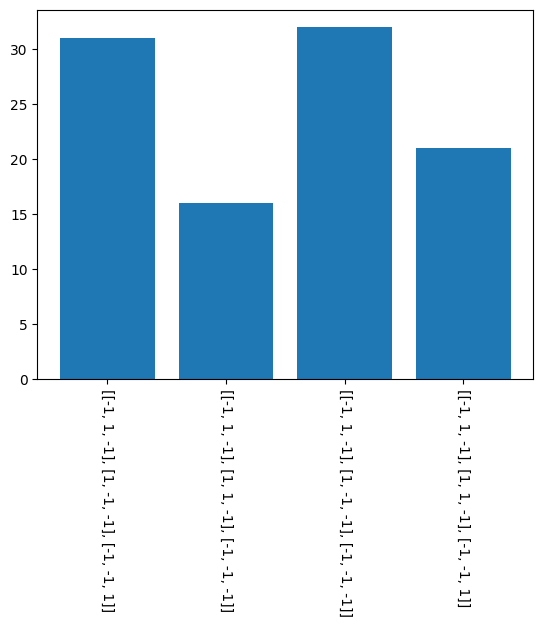

In [25]:
start = time()  # Start timing the simulation.

# Set parameters for the Ising model simulation.
J = -0.125 * np.log(0.5)  # Coupling strength, determining interaction between neighboring spins.
T = 1  # Temperature of the system, influencing spin flipping probabilities.
L = 3  # Dimensions of the lattice (3x3 grid).
dyct = {}  # Initialize a dictionary to record the distribution of spin configurations.

# Calculate probabilities for spin flipping based on energy change and temperature.
P1 = np.exp(-4 * J / T)  # Probability for a spin flip with energy change of 4J.
P2 = np.exp(-8 * J / T)  # Probability for a spin flip with energy change of 8J.

# Initialize the quantum circuit with 10 qubits and 1 classical bit for measurement.
q = QuantumRegister(10)  # Quantum register for the circuit.
c = ClassicalRegister(1)  # Classical register to store measurement results.
qc = QuantumCircuit(q, c)  # Create the quantum circuit using the registers.

# Main loop to repeat the Ising model simulation.
for t in range(100):  # Run the simulation 100 times to gather results.
    spins = s = [[1, -1, 1], [-1, 1, 1], [1, 1, -1]]  # Initialize a 3x3 spin configuration.
    
    # Loop over each position in the lattice to apply the 1D Ising model function.
    for temp10 in range(L):  # Loop over rows.
        for temp11 in range(L):  # Loop over columns.
            withoutH21D(temp10, temp11)  # Apply the withoutH21D function to each spin in the lattice.
    
    # Record the resulting spin configuration in the dictionary for analysis.
    encode(dyct, spins)

# Output the total simulation time.
print(float(time() - start), 'seconds')

# Display the recorded distribution of spin configurations.
print(dyct)

# Plot the distribution of configurations using a bar chart for visualization.
plotdyct(dyct)

This algorithm is an optimized version of solving 2D classic Ising model with quantum circuit. For the same problem, the circuit can be further optimized to improve its efficiency.

In a 2D classic Ising model, a spin has $4$ neighbors, giving a total of $2^4 = 16$ different combinations, with the central spin's direction fixed. Among all of these combinations, only 5 of them will lead to a positive energy change after a flip, and thus, a probabilistic flip ($1$ combination with energy change $+8J$ and $4$ combinations with energy change $+4J$). Compared to the previous algorithm, which calculates the probability of flipping a spin under different neighbors' combinations, it would be more efficient if we consider the probability of NOT flipping a spin if the neighbors are in one of the $5$ combinations with positive energy changes. The advantage of this design is that if the spins' configuration will not yield a positive energy change (which is the majority in all the cases), it will not go through this circuit, saving computation time.

Also, notice that the condition for a positive energy change with central spin down is exactly the opposite of the condition with central spin up. For example, in the case of $+8J$ energy change, all the 4 neighbors need to be spin up if the central spin is also up, and all of the 4 neighbor spins need to be down if the central spin is down. This prompts another optimization, that is, designing two separate circuits for spin-up and spin-down. The gates in the two circuits should be exactly the same, except that one is detecting for spin-ups and the other is detecting for spin-downs.

The optimized circuit for central spin pointing upward is: 

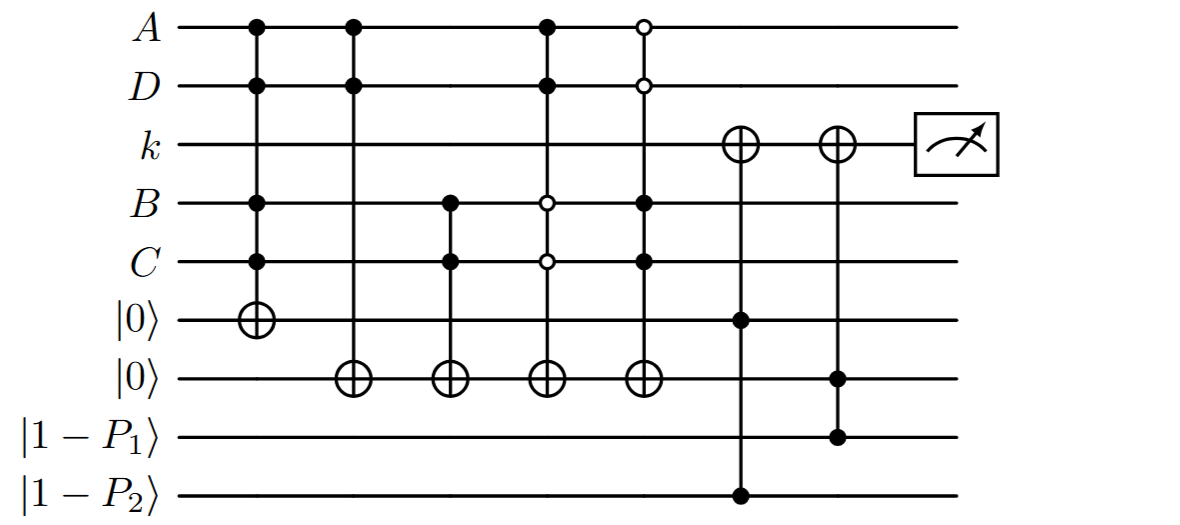

The optimized circuit for central spin pointing downward is:

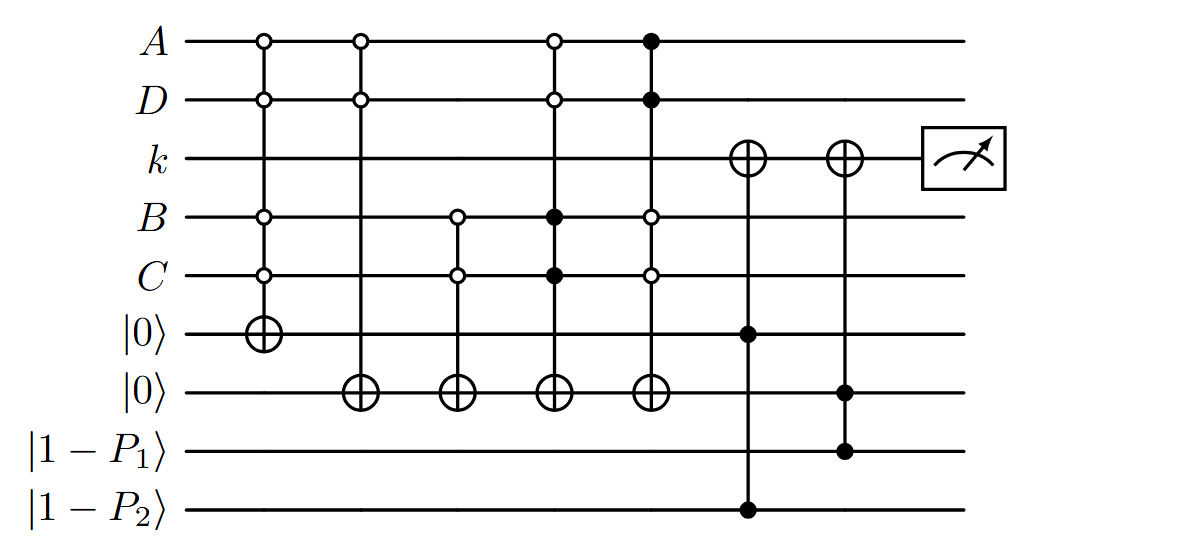

The two circuits above use the same notation as circuits before. $A$ stands for the central spin's upper neighbor, $D$ stands for lower neighbor, $B$ stands for left neighbor, and $C$ stands for right neighbor. There are two scratch qubits, $|0\rangle$ in the circuit and two probability qubits. Previous circuits calcaulte the probability of flipping a spin and have probbaility $P_1$ and $P_2$. In these circuits, we are calcaulting the probability of NOT flipping a spin, so the probability becomes $1-P_1$ and $1-P_2$. 

Another major modification of this circuit is that we use an indicator, $k$, to replace the central spin $S$ in previous circuits. Analyzing the circuit, the indicator starts with $|0\rangle$. It will become $|1\rangle$ if we decide not to flip it. If the central spin should be flipped, the indicator will remain $|0\rangle$. We then use the follwing equation to convert the state ($|0\rangle$ and $|1\rangle$) to $1$ and $-1$ for computation convenience, denoted by $I_{up}$ when the central spin is pointing upwards.

\begin{equation}
I_{up} = 2\cdot k - 1 
\end{equation}

The central spin, denoted by $S$ can be updated with:

\begin{equation}
S_{update} = S\cdot I_{up}\cdot S
\end{equation}

For the central spin pointing downwards, the equations for $I_{down}$ and updating central spin are:

\begin{equation}
I_{up} = -2\cdot k + 1 \\
S_{update} = S\cdot I_{up}\cdot S
\end{equation}

Other optimization includes modification in the structure of the circuit. In the previous qubit, we need three scratch qubits, $|0\rangle$, two to keep track of the energy change and the last to exclude special situations. However, the last scratch qubit's function can be integrated in the first two scratch qubits, saving one qubit in our lastest circuit. 

The codes for the two optimized circuits and a test run is demonstrated as below:

In [26]:
# Define the function for the 2D Ising model interaction without an external magnetic field. This function is used
# when the central spin is up.
# The spin configuraytion is:
#      A
#    B S C
#      D
def withoutH21Dup(rindex, cindex):
    
    # Initialize the quantum circuit with quantum and classical registers.
    qc = QuantumCircuit(q, c)
        
    # Apply U gates to q[7] and q[8] to create superpositions based on probabilities of NOT flipping a spin,
    # 1 - P1 and 1 - P2.
    qc.u(2 * np.arccos(np.sqrt(P1)), 0, 0, q[7])
    qc.u(2 * np.arccos(np.sqrt(P2)), 0, 0, q[8])

    # Set up the initial spin configuration based on the input lattice state.
    if spins[rindex - 1][cindex] == 1:
        qc.x(q[0])  # Flip q[0] if the spin above is up (periodic boundary condition).
    if spins[(rindex + 1) % L][cindex] == 1:
        qc.x(q[1]) # Flip q[1] if the spin below is up (periodic boundary condition).
    if spins[rindex][cindex - 1] == 1:
        qc.x(q[3]) # Flip q[3] if the spin to the left is up (periodic boundary condition).
    if spins[rindex][(cindex + 1) % L] == 1:
        qc.x(q[4]) # Flip q[4] if the spin to the right is up (periodic boundary condition).
    
    # Series of operations for interaction terms between spins.
    
    # Flip first |0> qubit if the 4 neighbors are in the same configuration.
    qc.mcx([q[0], q[1], q[3], q[4]], q[5])

    # Flip second |0> qubit if the 2 row or column neighbor spins are of the same configurations.
    qc.ccx(q[0], q[1], q[6])
    qc.ccx(q[3], q[4], q[6])
    
    # There are 2 special situations: The 2 row neighbors are up while the 2 column neighbors are down, or vice versa.
    # If we treat the 2D ising model as 2 1D ising model, then this situation should bring a positive energy change, 
    # but in fact, they exchange configurations and result in a 0 energy change.
    # If that happens, we flip the second |0> qubit again to correct the misjudement in the previous step.
    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[3], q[4]], q[6])
    qc.x(q[0])
    qc.x(q[1])
    
    qc.x(q[3])
    qc.x(q[4])
    qc.mcx([q[0], q[1], q[3], q[4]], q[6])
    qc.x(q[3])
    qc.x(q[4])
    
    # If all of S's 4 neighbors are spin up, there will be a +8J energy change after the flip. 
    # We calculate the probability of NOT flipping it, and reflect that on the indicator qubit, q[2].
    qc.x(q[6])
    qc.mcx([q[5], q[6], q[8]], q[2])
    qc.x(q[6])
    
    # If the central spin's 2 row or column neighbors are up, the energy change after the flip is +4J. 
    # We calculate the probability of NOT flipping it, and reflect that on the indicator qubit, q[2].
    qc.ccx(q[6], q[7], q[2])

    # These steps are for transpiling and running the circuit to measure the indicator, q[2].
    qc.measure(q[2], c)
    backend = Aer.get_backend('qasm_simulator')
    shots = 1
    transpiled_qc = transpile(qc, backend)
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # Return the indicator's value. |0> for flipping and |1> for not flipping.
    return int(list(counts.keys())[0])


# Define the function for the 2D Ising model interaction without an external magnetic field. This function is used
# when the central spin is down.
# The spin configuraytion is:
#      A
#    B S C
#      D
def withoutH21Ddown(rindex, cindex):
    
    # Initialize the quantum circuit with quantum and classical registers.
    qc = QuantumCircuit(q, c)
    
    # Apply U gates to q[7] and q[8] to create superpositions based on probabilities of NOT flipping a spin,
    # 1 - P1 and 1 - P2.
    qc.u(2 * np.arccos(np.sqrt(P1)), 0, 0, q[7])
    qc.u(2 * np.arccos(np.sqrt(P2)), 0, 0, q[8])

    # Set up the initial spin configuration based on the input lattice state.
    if spins[rindex - 1][cindex] == 1:
        qc.x(q[0])# Flip q[0] if the spin above is up (periodic boundary condition).
    if spins[(rindex + 1) % L][cindex] == 1:
        qc.x(q[1]) # Flip q[1] if the spin below is up (periodic boundary condition).
    if spins[rindex][cindex - 1] == 1:
        qc.x(q[3]) # Flip q[3] if the spin to the left is up (periodic boundary condition).
    if spins[rindex][(cindex + 1) % L] == 1:
        qc.x(q[4]) # Flip q[4] if the spin to the right is up (periodic boundary condition).
    
    # Series of operations for interaction terms between spins.
    
    # Flip first |0> qubit if the 4 neighbors are in the same configuration.
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[3])
    qc.x(q[4])
    qc.mcx([q[0], q[1], q[3], q[4]], q[5])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[3])
    qc.x(q[4])

    # Flip second |0> qubit if the 2 row or column neighbor spins are of the same configurations.
    qc.x(q[0])
    qc.x(q[1])
    qc.ccx(q[0], q[1], q[6])
    qc.x(q[0])
    qc.x(q[1])

    qc.x(q[3])
    qc.x(q[4])
    qc.ccx(q[3], q[4], q[6])
    qc.x(q[3])
    qc.x(q[4])
    
    # There are 2 special situations: The 2 row neighbors are down while the 2 column neighbors are up, or vice versa.
    # If we treat the 2D ising model as 2 1D ising model, then this situation should bring a positive energy change, 
    # but in fact, they exchange configurations and result in a 0 energy change.
    # If that happens, we flip the second |0> qubit again to correct the misjudement in the previous step.
    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[3], q[4]], q[6])
    qc.x(q[0])
    qc.x(q[1])
    
    qc.x(q[3])
    qc.x(q[4])
    qc.mcx([q[0], q[1], q[3], q[4]], q[6])
    qc.x(q[3])
    qc.x(q[4])
    
    # If all of S's 4 neighbors are spin down, there will be a +8J energy change after the flip. 
    # We calculate the probability of NOT flipping it, and reflect that on the indicator qubit, q[2].
    qc.x(q[6])
    qc.mcx([q[5], q[6], q[8]], q[2])
    qc.x(q[6])
    
    # If the central spin's 2 row or column neighbors are down, the energy change after the flip is +4J (except special situations). 
    # We calculate the probability of NOT flipping it, and reflect that on the indicator qubit, q[2].
    qc.ccx(q[6], q[7], q[2])

    # These steps are for transpiling and running the circuit to measure the indicator, q[2].
    qc.measure(q[2], c)
    backend = Aer.get_backend('qasm_simulator')
    shots = 1
    transpiled_qc = transpile(qc, backend)
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    # Return the indicator's value. |0> for flipping and |1> for not flipping. 
    return int(list(counts.keys())[0])

165.0693838596344 seconds
{'[[-1, 1, -1], [1, -1, -1], [-1, -1, 1]]': 20, '[[-1, 1, -1], [1, -1, -1], [-1, -1, -1]]': 31, '[[-1, 1, -1], [1, 1, -1], [-1, -1, 1]]': 29, '[[-1, 1, -1], [1, 1, -1], [-1, -1, -1]]': 20}


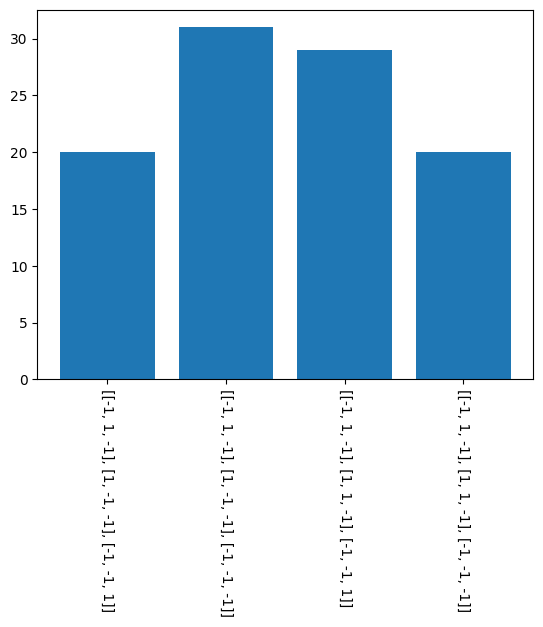

In [27]:
start = time() # Start timing the simulation.

# Set parameters for the Ising model simulation.
J = -0.125*np.log(0.5) # Coupling strength, determining interaction between neighboring spins.
T = 1 # Temperature of the system, influencing spin flipping probabilities.
L = 3 # Dimensions of the lattice (3x3 grid).
dyct = {}  # Initialize a dictionary to record the distribution of spin configurations.

# Calculate probabilities for spin flipping based on energy change and temperature.
P1 = np.exp(-4 * J / T) # Probability for a spin flip with energy change of 4J.
P2 = np.exp(-8 * J / T) # Probability for a spin flip with energy change of 8J.


# Initialize the quantum circuit with 9 qubits and 1 classical bit for measurement.
q = QuantumRegister(9) # Quantum register for the circuit.
c = ClassicalRegister(1) # Classical register to store measurement results.
qc = QuantumCircuit(q, c) # Create the quantum circuit using the registers.

# Main loop to repeat the Ising model simulation.
for t in range(100): # Run the simulation 100 times to gather results.
    
    spins = [[1, -1, 1], [-1, 1, 1], [1, 1, -1]] # Initialize a 3x3 spin configuration.
    
    # Loop over each position in the lattice to apply the 1D Ising model function.
    for temp10 in range (0, L): # Loop over rows.
        for temp11 in range (0, L): # Loop over columns.
            if spins[temp10][temp11] > 0:
                # Apply the withoutH21Dup function to the spin if it is up.
                spins[temp10][temp11] = spins[temp10][temp11] * (2 * withoutH21Dup(temp10, temp11) - 1) * spins[temp10][temp11]
            else:
                # Apply the withoutH21Ddown function to the spin if it is down.
                spins[temp10][temp11] = spins[temp10][temp11] * (-2 * withoutH21Ddown(temp10, temp11) + 1) * spins[temp10][temp11]
    
    # Record the resulting spin configuration in the dictionary for analysis.
    encode(dyct, spins)

    # Output the total simulation time.
print(float(time() - start), 'seconds')

# Display the recorded distribution of spin configurations.
print(dyct)

# Plot the distribution of configurations using a bar chart for visualization.
plotdyct(dyct)

Compared to both the previous circuit and the one presented in the Cole et al. 2004 paper, the algorithm presented above requires fewer qubits, fewer gates and less time while yielding accurate result.

The same principle could be extended to 3D classic Ising model, as well as other varieties such as the Ising model with diganonal-neighbor interaction, Cayley trees, and others. For an $n-$dimensional classic Ising model, the relationship between the dimension and the numbers of qubits and gates required are:

\begin{equation}
\text{number of qubits} = 2n+n+n+1 = 4n+1
\end{equation}

\begin{equation}
\text{number of gates} = \sum^n_{i=1}C^i_n+2\sum^{n-1}_{i=1}C^i_n+\prod_{i=1}^{n-1}C^i_n+1
\end{equation}

Below we present the circuit design for a 3-dimensional classic Ising model with no external field.
The circuit design for central spin pointing upward is:

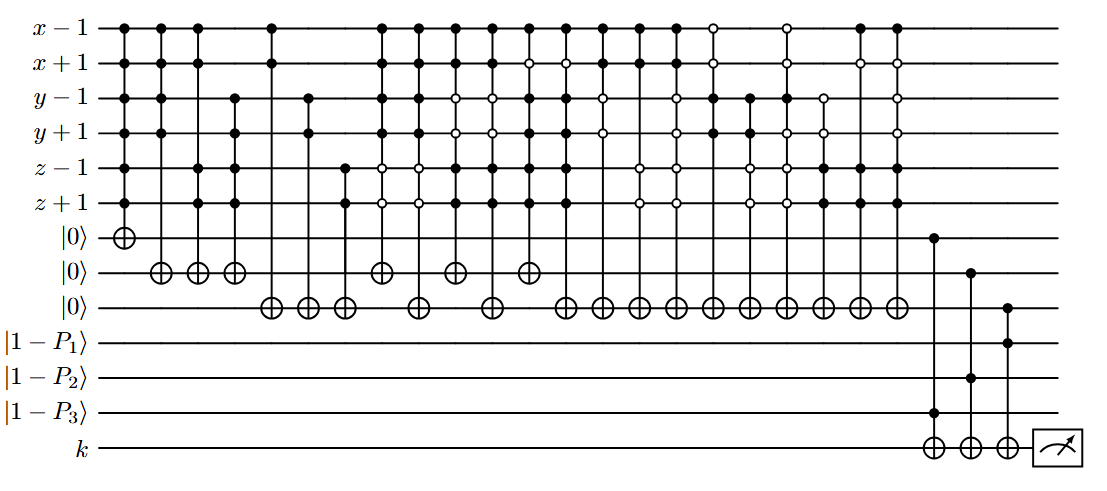

The circuit design for central spin pointing downwards is:

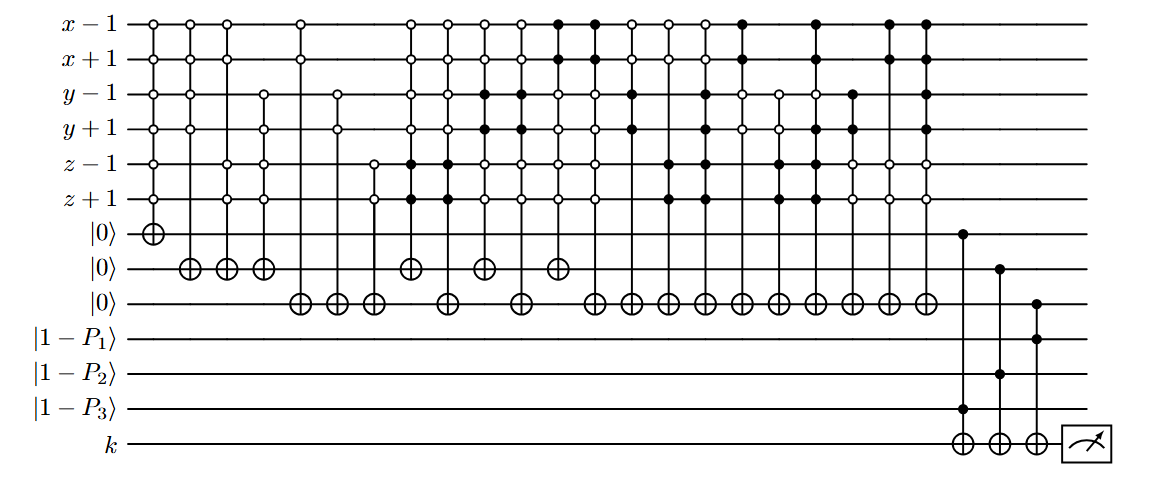

We also provide the codes for these two circuits and a test run.

In [28]:
# Define the function for the 3D Ising model interaction without an external magnetic field. This function is used
# when the central spin is up.
# xindex, yindex, and zindex stands for the central spin's carteisan coordinate in a lattice with one of its edge as origin.
def withoutH31Dup(xindex, yindex, zindex):
    
    # Initialize the quantum circuit with quantum and classical registers.
    qc = QuantumCircuit(q, c)
    
    # Apply U gates to q[9], q[10], and q[11] to create superpositions based on probabilities P1, P2, and P3.
    qc.u(2 * np.arccos(np.sqrt(P1)), 0, 0, q[9])
    qc.u(2 * np.arccos(np.sqrt(P2)), 0, 0, q[10])
    qc.u(2 * np.arccos(np.sqrt(P3)), 0, 0, q[11])

    # Set up the initial spin configuration based on the input lattice state.
    if spins[(xindex - 1) % L][yindex][zindex] == 1:
        qc.x(q[0]) # Flip q[0] if the spin at (x-1, y, z) is up (periodic boundary condition).
    if spins[(xindex + 1) % L][yindex][zindex] == 1:
        qc.x(q[1]) # Flip q[1] if the spin at (x+1, y, z) is up (periodic boundary condition).
    if spins[xindex][(yindex - 1) % L][zindex] == 1:
        qc.x(q[2]) # Flip q[2] if the spin at (x, y-1, z) is up (periodic boundary condition).  
    if spins[xindex][(yindex + 1) % L][zindex] == 1:
        qc.x(q[3]) # Flip q[3] if the spin at (x, y+1, z) is up (periodic boundary condition).   
    if spins[xindex][yindex][(zindex - 1) % L] == 1:
        qc.x(q[4]) # Flip q[4] if the spin at (x, y, z-1) is up (periodic boundary condition).
    if spins[xindex][yindex][(zindex + 1) % L] == 1:
        qc.x(q[5]) # Flip q[5] if the spin at (x, y, z+1) is up (periodic boundary condition).
    
    # Series of operations for interaction terms between spins.

    # Flip first |0> qubit if the 6 neighbor spins are in the same configuration.
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[6])

    # Flip second |0> qubit if 2 of 3 sets of neighbor spins are in the same configuration.
    qc.mcx([q[0], q[1], q[2], q[3]], q[7])
    qc.mcx([q[0], q[1], q[4], q[5]], q[7])
    qc.mcx([q[2], q[3], q[4], q[5]], q[7])

    # Flip third |0> qubit if 1 of 3 sets of neighbor spins are in the same configuration.
    qc.ccx(q[0], q[1], q[8])
    qc.ccx(q[2], q[3], q[8])
    qc.ccx(q[4], q[5], q[8])

    # There are speical situations where 2 of 3 sets of neighbor spins are up, but the other is down.
    # In this case, instead of a +8J energy, change, there is only +4J energy change. We correct each of 
    # these situations with two gates.
    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[7])
    qc.x(q[4])
    qc.x(q[5])

    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[4])
    qc.x(q[5])
    
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[7])
    qc.x(q[2])
    qc.x(q[3])

    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[2])
    qc.x(q[3])

    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[7])
    qc.x(q[0])
    qc.x(q[1])

    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[0])
    qc.x(q[1])

    # There are speical situations where 1 of 3 sets of neighbor spins are up, but the other two sets are down.
    # In this case, instead of a +4J energy, change, there is no energy change. We correct each of 
    # these situations with three gates.
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[8])
    qc.x(q[2])
    qc.x(q[3])

    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[4], q[5]], q[8])
    qc.x(q[4])
    qc.x(q[5])

    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.x(q[5])

    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[2], q[3]], q[8])
    qc.x(q[0])
    qc.x(q[1])

    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[4])
    qc.x(q[5])

    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[4])
    qc.x(q[5])
    
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[2])
    qc.x(q[3])

    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[4], q[5]], q[8])
    qc.x(q[0])
    qc.x(q[1])

    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])

    # If all of S's 6 neighbors are spin up, there will be a +12J energy change after the flip. 
    # We calculate the probability of NOT flipping it, and reflect that on the indicator qubit, q[12].
    qc.ccx(q[6], q[11], q[12])

    # If S's 4 neighbors are spin up, there will be a +8J energy change after the flip (except special situations).
    # We calculate the probability of NOT flipping it, and reflect that on the indicator qubit, q[12].
    qc.ccx(q[7], q[10], q[12])

    # If S's 2 neighbors are spin up, there will be a +4J energy change after the flip (except special situations).
    # We calculate the probability of NOT flipping it, and reflect that on the indicator qubit, q[12].
    qc.ccx(q[8], q[9], q[12])
    
    # These steps are for transpiling and running the circuit to measure the indicator, q[12].
    qc.measure(q[12], c)
    backend = Aer.get_backend('qasm_simulator')
    shots = 1
    transpiled_qc = transpile(qc, backend)
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # Return the indicator's value. |0> for flipping and |1> for not flipping. 
    return int(list(counts.keys())[0])


# Define the function for the 3D Ising model interaction without an external magnetic field. This function is used
# when the central spin is down.
# xindex, yindex, and zindex stands for the central spin's carteisan coordinate in a lattice with one of its edge as origin.
def withoutH31Ddown(xindex, yindex, zindex):
    
    # Initialize the quantum circuit with quantum and classical registers.
    qc = QuantumCircuit(q, c)
    
    # Apply U gates to q[9], q[10], and q[11] to create superpositions based on probabilities P1, P2, and P3.
    qc.u(2 * np.arccos(np.sqrt(P1)), 0, 0, q[9])
    qc.u(2 * np.arccos(np.sqrt(P2)), 0, 0, q[10])
    qc.u(2 * np.arccos(np.sqrt(P3)), 0, 0, q[11])

    # Set up the initial spin configuration based on the input lattice state.
    if spins[(xindex - 1) % L][yindex][zindex] == 1:
        qc.x(q[0]) # Flip q[0] if the spin at (x-1, y, z) is up (periodic boundary condition).
    if spins[(xindex + 1) % L][yindex][zindex] == 1:
        qc.x(q[1]) # Flip q[1] if the spin at (x+1, y, z) is up (periodic boundary condition).
    if spins[xindex][(yindex - 1) % L][zindex] == 1:
        qc.x(q[2]) # Flip q[2] if the spin at (x, y-1, z) is up (periodic boundary condition).  
    if spins[xindex][(yindex + 1) % L][zindex] == 1:
        qc.x(q[3]) # Flip q[3] if the spin at (x, y+1, z) is up (periodic boundary condition).   
    if spins[xindex][yindex][(zindex - 1) % L] == 1:
        qc.x(q[4]) # Flip q[4] if the spin at (x, y, z-1) is up (periodic boundary condition).
    if spins[xindex][yindex][(zindex + 1) % L] == 1:
        qc.x(q[5]) # Flip q[5] if the spin at (x, y, z+1) is up (periodic boundary condition).
     
    # Series of operations for interaction terms between spins.

    # Flip first |0> qubit if the 6 neighbor spins are in the same configuration.
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[6])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.x(q[5])

    # Flip second |0> qubit if 2 of 3 sets of neighbor spins are in the same configuration.
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[7])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])

    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[4], q[5]], q[7])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[4])
    qc.x(q[5])

    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[2], q[3], q[4], q[5]], q[7])
    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.x(q[5])

    # Flip third |0> qubit if 1 of 3 sets of neighbor spins are in the same configuration.
    qc.x(q[0])
    qc.x(q[1])
    qc.ccx(q[0], q[1], q[8])
    qc.x(q[0])
    qc.x(q[1])

    qc.x(q[2])
    qc.x(q[3])
    qc.ccx(q[2], q[3], q[8])
    qc.x(q[2])
    qc.x(q[3])

    qc.x(q[4])
    qc.x(q[5])
    qc.ccx(q[4], q[5], q[8])
    qc.x(q[4])
    qc.x(q[5])

    # There are speical situations where 2 of 3 sets of neighbor spins are down, but the other is down.
    # In this case, instead of a +8J energy, change, there is only +4J energy change. We correct each of 
    # these situations with two gates.
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[7])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])

    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[7])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[4])
    qc.x(q[5])

    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[4])
    qc.x(q[5])

    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[7])
    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.x(q[5])

    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[2])
    qc.x(q[3])
    qc.x(q[4])
    qc.x(q[5])

    # There are speical situations where 1 of 3 sets of neighbor spins are down, but the other two sets are down.
    # In this case, instead of a +4J energy, change, there is no energy change. We correct each of 
    # these situations with three gates.
    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[2], q[3]], q[8])
    qc.x(q[0])
    qc.x(q[1])

    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[4], q[5]], q[8])
    qc.x(q[0])
    qc.x(q[1])

    qc.x(q[0])
    qc.x(q[1])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[0])
    qc.x(q[1])

    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3]], q[8])
    qc.x(q[2])
    qc.x(q[3])

    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[2])
    qc.x(q[3])

    qc.x(q[2])
    qc.x(q[3])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[2])
    qc.x(q[3])

    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[4])
    qc.x(q[5])

    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[4], q[5]], q[8])
    qc.x(q[4])
    qc.x(q[5])

    qc.x(q[4])
    qc.x(q[5])
    qc.mcx([q[0], q[1], q[2], q[3], q[4], q[5]], q[8])
    qc.x(q[4])
    qc.x(q[5])
    
    # If all of S's 6 neighbors are spin down, there will be a +12J energy change after the flip. 
    # We calculate the probability of NOT flipping it, and reflect that on the indicator qubit, q[12].
    qc.ccx(q[6], q[11], q[12])

    # If S's 4 neighbors are spin down, there will be a +8J energy change after the flip (except special situations).
    # We calculate the probability of NOT flipping it, and reflect that on the indicator qubit, q[12].
    qc.ccx(q[7], q[10], q[12])

    # If S's 2 neighbors are spin down, there will be a +4J energy change after the flip (except special situations).
    # We calculate the probability of NOT flipping it, and reflect that on the indicator qubit, q[12].
    qc.ccx(q[8], q[9], q[12])
    
    # These steps are for transpiling and running the circuit to measure the indicator, q[12].
    qc.measure(q[12], c)
    backend = Aer.get_backend('qasm_simulator')
    shots = 1
    transpiled_qc = transpile(qc, backend)
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    # Return the indicator's value. |0> for flipping and |1> for not flipping. 
    return int(list(counts.keys())[0])

In [30]:
start = time() # Start timing the simulation.

# Set parameters for the Ising model simulation.
J = -np.log(0.5)/12 # Coupling strength, determining interaction between neighboring spins.
T = 1 # Temperature of the system, influencing spin flipping probabilities.
L = 3 # Dimensions of the lattice (3x3x3 lattice).
dyct = {} # Initialize a dictionary to record the distribution of spin configurations.

# Calculate probabilities for spin flipping based on energy change and temperature.
P1 = np.exp(-4 * J / T) # Probability for a spin flip with energy change of 4J.
P2 = np.exp(-8 * J / T) # Probability for a spin flip with energy change of 8J.
P3 = np.exp(-12 * J / T) # Probability for a spin flip with energy change of 12J.

# Initialize the quantum circuit with 10 qubits and 1 classical bit for measurement.
q = QuantumRegister(13)  # Quantum register for the circuit.
c = ClassicalRegister(1) # Classical register to store measurement results.
qc = QuantumCircuit(q, c) # Create the quantum circuit using the registers.

# Main loop to repeat the Ising model simulation.
for t in range(100):# Run the simulation 100 times to gather results.
    
    spins = np.ones((L, L, L), dtype=int) # Initialize a 3x3x3 spin configuration.
    spins[0][1][2] = -1
    spins[0][0][2] = -1
    spins[1][2][1] = -1
    
    # Loop over each position in the lattice to apply the 1D Ising model function.
    for temp10 in range (0, L): # Loop over x-axis.
        for temp11 in range (0, L): # Loop over y-axis.
            for temp12 in range (0, L): # Loop over z-axis.
                if spins[temp10][temp11][temp12] > 0:
                    # Apply the withoutH31Dup function to the spin if it is up.
                    spins[temp10][temp11][temp12] = spins[temp10][temp11][temp12] * (2 * withoutH31Dup(temp10, temp11, temp12) - 1) * spins[temp10][temp11][temp12]
                else:
                    # Apply the withoutH31Ddown function to the spin if it is down.
                    spins[temp10][temp11][temp12] = spins[temp10][temp11][temp12] * (-2 * withoutH31Ddown(temp10, temp11, temp12) + 1) * spins[temp10][temp11][temp12]

    # Record the resulting spin configuration in the dictionary for analysis.
    encode(dyct, spins)

# Output the total simulation time.
print(float(time() - start), 'seconds')

519.52245926857 seconds


In [ ]:
# Plot the distribution of configurations using a bar chart for visualization.
plotdyct(dyct);

## 4. Conclusion

This notebook presents three examples, each with corresponding classical and quantum algorithms,
increasing in complexity to illustrate key concepts in quantum computing. In the first example, we
introduce the Hadamard Gate, highlighting its role as a fundamental difference between quantum
and classical computing. The second example, a random walk, demonstrates how differing interpre-
tations of 'randomness' lead to vastly different outcomes in quantum versus classical algorithms.
Finally, the Ising model example showcases how advanced quantum algorithms can be applied to
well-studied physical systems. We hope this notebook helps students deepen their understanding
of quantum computing and its unique advantages.